# Programming Assignment 5 - Support Vector Machines 
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [125]:
# Importing the libraries to be used:
import numpy as np
from numpy import random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [126]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = -1.0
    y[y==3] = 0.0
    y[y>3] = 1.0
    print(f'Current y hist: {np.histogram(y, [-1.5, -0.5, 0.5, 1.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = 3

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(f'ScaledX[:10, :]:\n{X[:10, :]}') # Looking the new features after scaling

    # Split the data into training and test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    return X_train, y_train, X_test, y_test

### Confusion Matrix and Classification Analysis

In [127]:
def confusion_and_classification(y, y_hat, title):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='winter')
    plt.title(title)
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0, labels=range(3))
    # accuracy
    print(cr[: cr.find('micro') - 5])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [128]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)
    
    # Fit the classifier on the training set
    svc_linear.fit(X_train, y_train)

    acc_train = svc_linear.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print(f'SVM - Linear, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_linear_train)

    acc_test = svc_linear.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_linear_test, f'C={c}')

# SVM using Radial Basis Function(RBF) Kernel.

In [129]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf):
    # Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, random_state=24)
    
    # Fit the classifier on the training set
    svc_rbf.fit(X_train, y_train)

    acc_train = svc_rbf.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print(f'SVM - RBF, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_rbf_train)

    acc_test = svc_rbf.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_rbf_test, f'C={c}')

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [130]:
def svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly):
    # Create an object of svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    # Fit the classifier on the training set
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(X_train, y_train)

    acc_train = svc_polynomial.score(X_train, y_train)
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print(f'SVM - Poly, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_poly_train)

    acc_test = svc_polynomial.score(X_test, y_test)
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_poly_test, f'C={c}')

In [131]:
def train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly):
    # Linear
    acc_train_svm_linear = []
    acc_test_svm_linear = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # c_svm_linear = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    for c in c_svm_linear:
        svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_linear, acc_train_svm_linear, color='red', label='Training Accuracy')
    plt.plot(c_svm_linear, acc_test_svm_linear, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Linear - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Radial Basis Function
    acc_train_svm_rbf = []
    acc_test_svm_rbf = []
    # c_svm_rbf = [0.1, 1, 10, 100, 1000]
    for c in c_svm_rbf:
        svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_rbf, acc_train_svm_rbf, color='red', label='Training Accuracy')
    plt.plot(c_svm_rbf, acc_test_svm_rbf, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('RBF - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



    # # Poly
    acc_train_svm_poly = []
    acc_test_svm_poly = []
    # c_svm_poly = [0.1, 1, 10, 100, 1000]
    for c in c_svm_poly:
        svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_poly, acc_train_svm_poly, color='red', label='Training Accuracy')
    plt.plot(c_svm_poly, acc_test_svm_poly, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Poly - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [132]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [133]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[ 0.  1.  0.  0.  0.  1.  0. -1.  0.  0.]
X[:10, :]:
[[1.0600e+01 3.4000e-01 4.9000e-01 3.2000e+00 7.8000e-02 2.0000e+01
  7.8000e+01 9.9920e-01 3.1900e+00 7.0000e-01 1.0000e+01]
 [5.1000e+00 5.1000e-01 1.8000e-01 2.1000e+00 4.2000e-02 1.6000e+01
  1.0100e+02 9.9240e-01 3.4600e+00 8.7000e-01 1.2900e+01]
 [8.9000e+00 2.4000e-01 3.9000e-01 1.6000e+00 7.4000e-02 3.0000e+00
  1.0000e+01 9.9698e-01 3.1200e+00 5.9000e-01 9.5000e+00]
 [1.1300e+01 3.6000e-01 6.6000e-01 2.4000e+00 1.2300e-01 3.0000e+00
  8.0000e+00 9.9642e-01 3.2000e+00 5.3000e-01 1.1900e+01]
 [7.7000e+00 5.8000e-01 1.0000e-01 1.8000e+00 1.0200e-01 2.8000e+01
  1.0900e+02 9.9565e-01 3.0800e+00 4.9000e-01 9.8000e+00]
 [9.5000e+00 3.9000e-01 4.1000e-01 8.9000e+00 6.9000e-02 1.8000e+

SVM - Linear, Train Accuracy = 0.6293979671618452, C=0.06
Test Accuracy = 0.621875


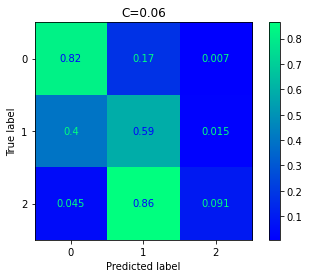

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       133
           1       0.57      0.09      0.16        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1686484542057196

SVM - Linear, Train Accuracy = 0.6387802971071149, C=10.262857142857143
Test Accuracy = 0.621875


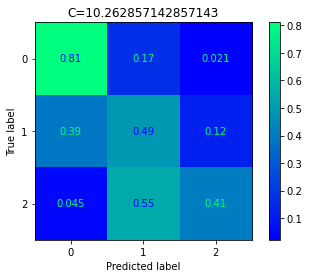

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=20.465714285714284
Test Accuracy = 0.621875


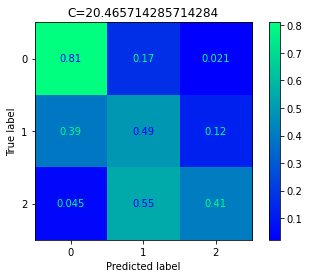

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=30.66857142857143
Test Accuracy = 0.621875


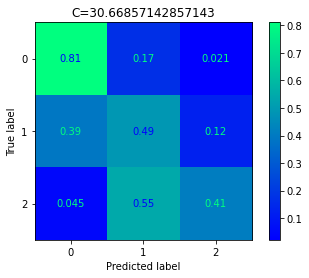

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=40.871428571428574
Test Accuracy = 0.621875


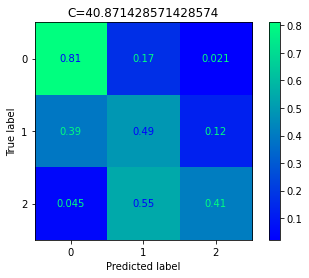

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=51.074285714285715
Test Accuracy = 0.621875


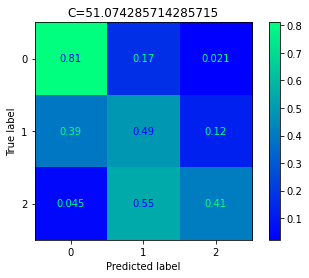

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=61.27714285714286
Test Accuracy = 0.621875


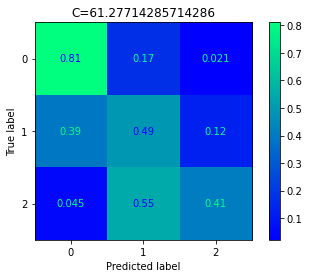

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=71.48
Test Accuracy = 0.621875


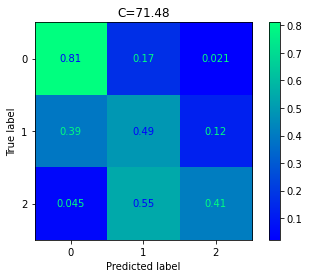

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=81.68285714285715
Test Accuracy = 0.621875


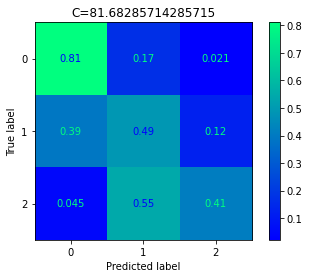

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=91.88571428571429
Test Accuracy = 0.621875


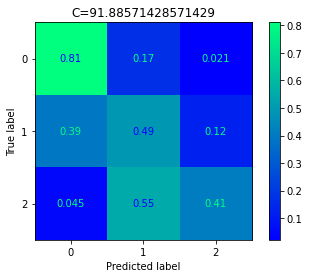

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=102.08857142857143
Test Accuracy = 0.621875


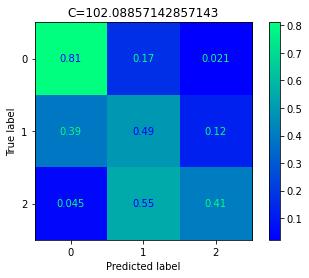

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=112.29142857142857
Test Accuracy = 0.621875


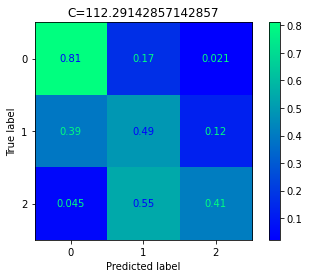

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=122.49428571428572
Test Accuracy = 0.621875


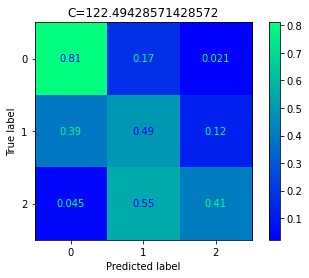

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=132.69714285714286
Test Accuracy = 0.621875


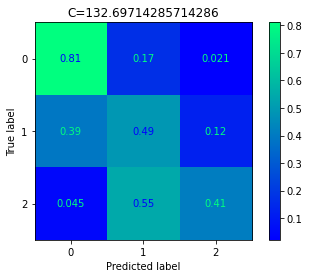

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=142.9
Test Accuracy = 0.621875


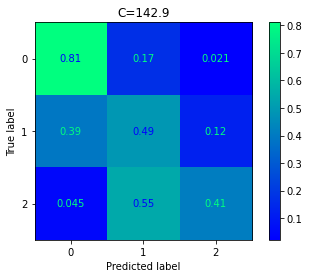

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=153.10285714285715
Test Accuracy = 0.621875


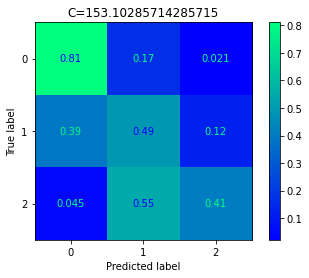

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=163.3057142857143
Test Accuracy = 0.621875


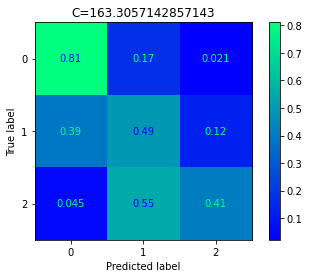

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=173.50857142857143
Test Accuracy = 0.621875


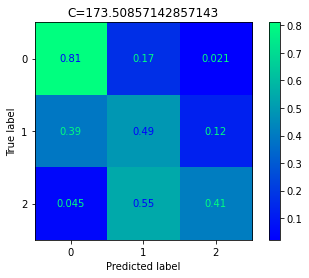

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=183.71142857142857
Test Accuracy = 0.621875


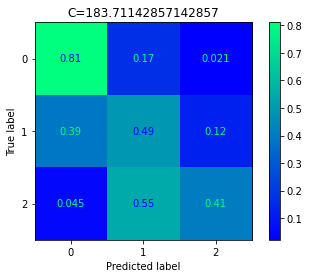

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=193.9142857142857
Test Accuracy = 0.621875


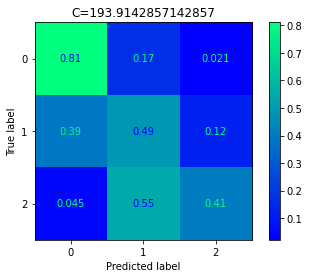

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=204.11714285714285
Test Accuracy = 0.621875


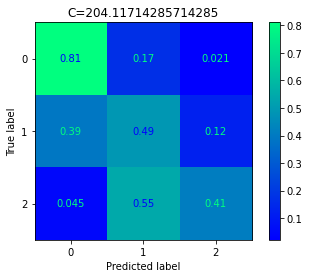

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=214.32
Test Accuracy = 0.621875


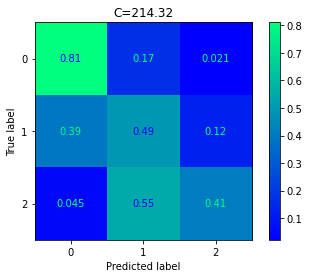

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=224.52285714285713
Test Accuracy = 0.621875


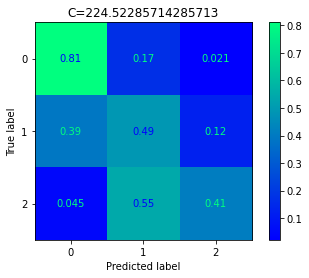

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=234.72571428571428
Test Accuracy = 0.621875


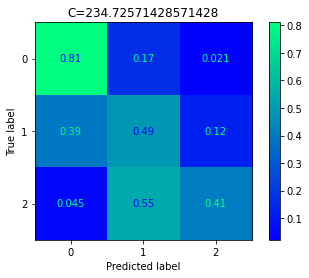

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=244.92857142857144
Test Accuracy = 0.621875


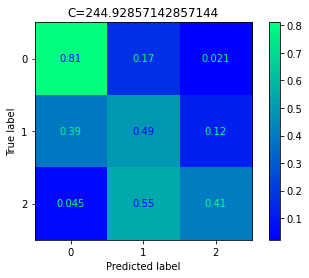

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=255.1314285714286
Test Accuracy = 0.621875


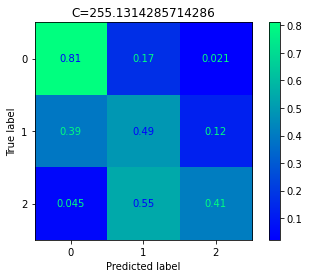

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=265.3342857142857
Test Accuracy = 0.621875


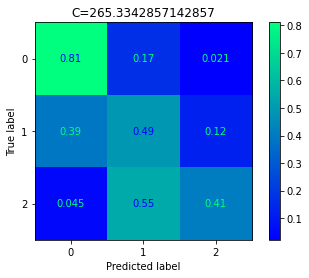

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=275.53714285714284
Test Accuracy = 0.621875


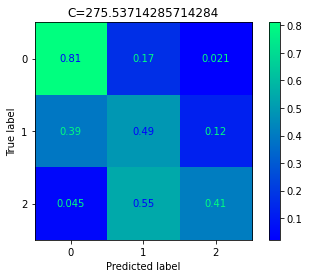

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=285.74
Test Accuracy = 0.621875


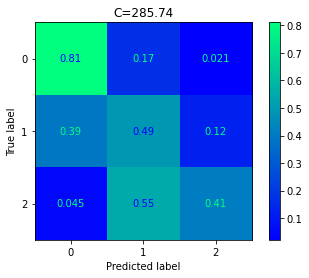

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=295.9428571428571
Test Accuracy = 0.621875


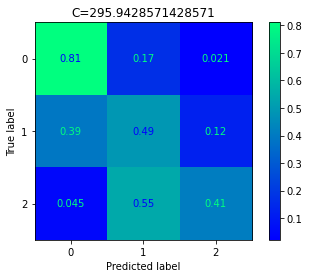

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=306.1457142857143
Test Accuracy = 0.621875


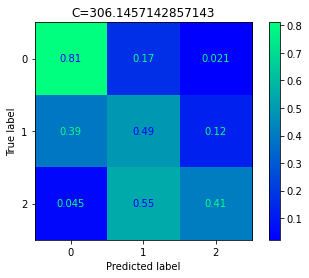

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=316.3485714285714
Test Accuracy = 0.621875


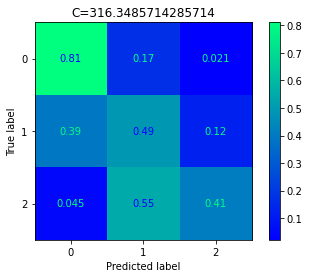

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=326.5514285714286
Test Accuracy = 0.621875


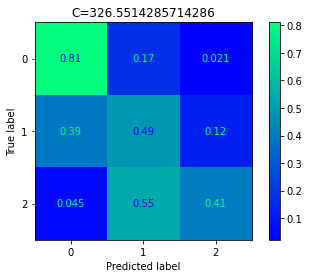

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=336.75428571428574
Test Accuracy = 0.621875


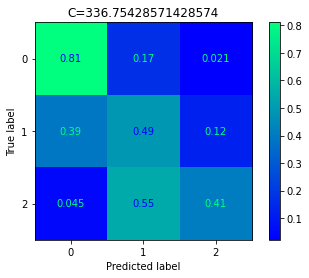

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=346.95714285714286
Test Accuracy = 0.621875


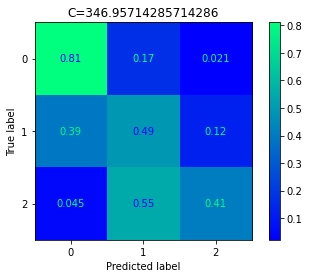

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=357.16
Test Accuracy = 0.621875


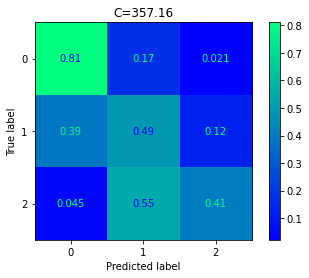

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=367.36285714285714
Test Accuracy = 0.621875


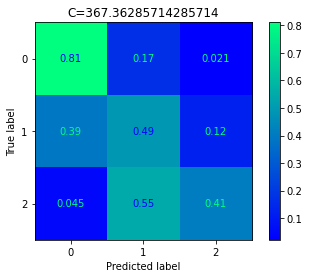

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=377.5657142857143
Test Accuracy = 0.621875


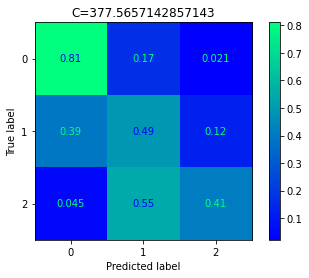

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=387.7685714285714
Test Accuracy = 0.621875


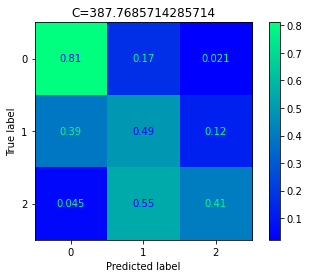

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=397.9714285714286
Test Accuracy = 0.621875


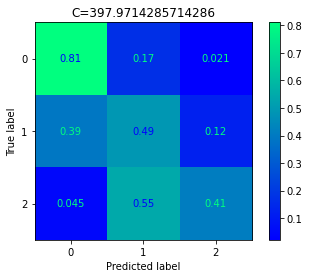

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=408.1742857142857
Test Accuracy = 0.621875


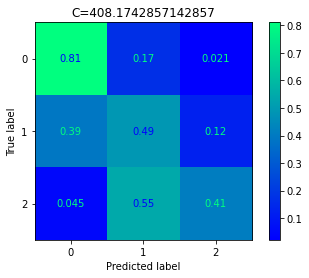

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=418.37714285714287
Test Accuracy = 0.621875


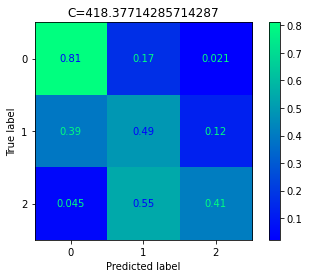

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=428.58
Test Accuracy = 0.621875


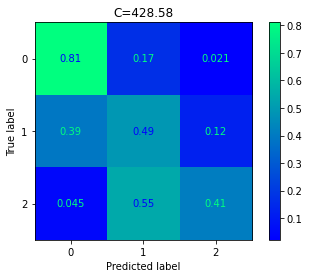

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=438.78285714285715
Test Accuracy = 0.621875


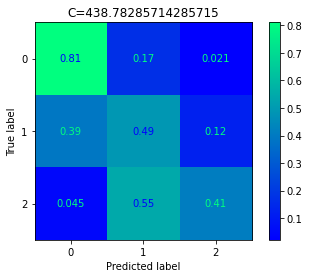

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=448.98571428571427
Test Accuracy = 0.621875


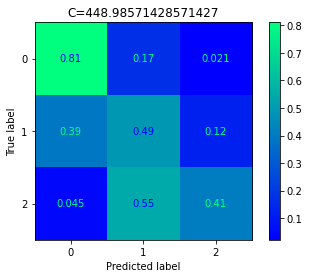

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=459.18857142857144
Test Accuracy = 0.621875


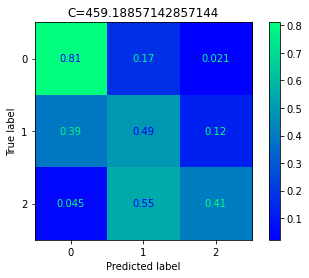

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=469.39142857142855
Test Accuracy = 0.621875


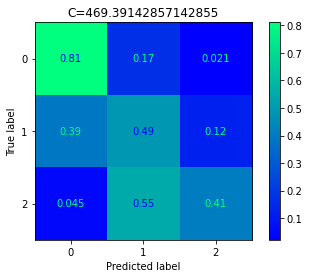

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=479.5942857142857
Test Accuracy = 0.621875


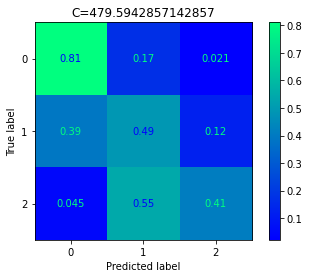

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=489.7971428571429
Test Accuracy = 0.621875


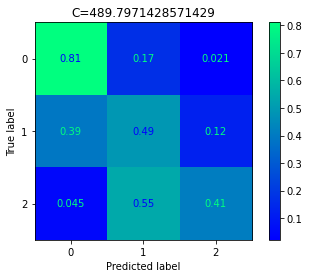

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Linear, Train Accuracy = 0.6387802971071149, C=500.0
Test Accuracy = 0.621875


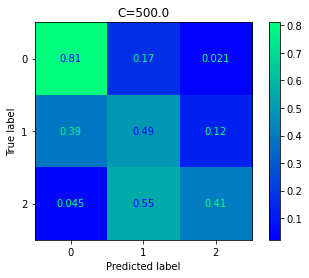

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       133
           1       0.49      0.41      0.44        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828



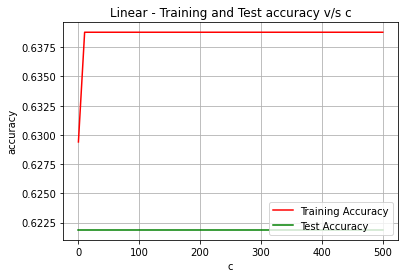

SVM - RBF, Train Accuracy = 0.7114933541829555, C=1.0
Test Accuracy = 0.653125


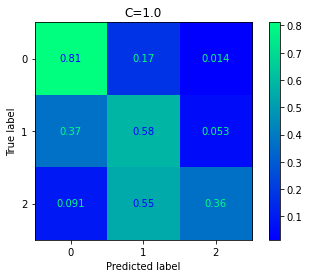

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       133
           1       0.64      0.36      0.46        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17504346609644483

SVM - RBF, Train Accuracy = 0.8037529319781079, C=7.1020408163265305
Test Accuracy = 0.65


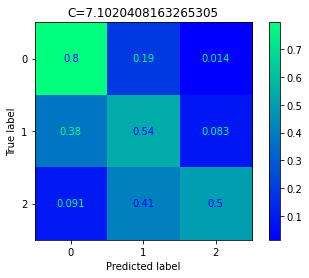

              precision    recall  f1-score   support

           0       0.62      0.54      0.58       133
           1       0.63      0.50      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1686484542057196

SVM - RBF, Train Accuracy = 0.8279906176700548, C=13.204081632653061
Test Accuracy = 0.65625


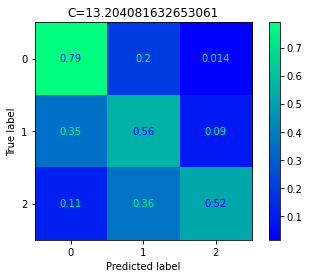

              precision    recall  f1-score   support

           0       0.63      0.56      0.59       133
           1       0.62      0.52      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1622534423149944

SVM - RBF, Train Accuracy = 0.8451915559030493, C=19.306122448979593
Test Accuracy = 0.65


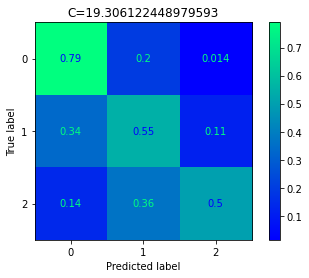

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       133
           1       0.56      0.50      0.53        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - RBF, Train Accuracy = 0.853010164190774, C=25.408163265306122
Test Accuracy = 0.65


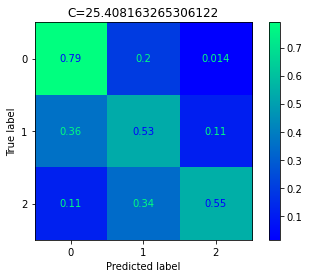

              precision    recall  f1-score   support

           0       0.62      0.53      0.57       133
           1       0.60      0.55      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14946341853354395

SVM - RBF, Train Accuracy = 0.8600469116497264, C=31.51020408163265
Test Accuracy = 0.653125


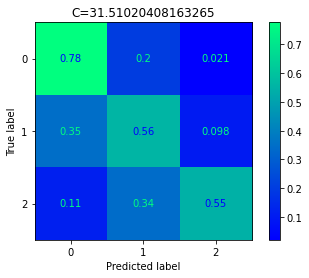

              precision    recall  f1-score   support

           0       0.63      0.56      0.59       133
           1       0.60      0.55      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1366733947520935

SVM - RBF, Train Accuracy = 0.8670836591086787, C=37.61224489795919
Test Accuracy = 0.653125


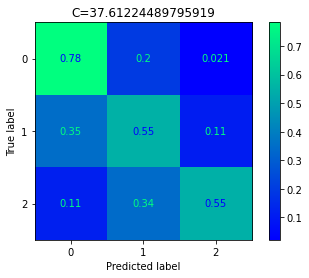

              precision    recall  f1-score   support

           0       0.63      0.55      0.59       133
           1       0.59      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1366733947520935

SVM - RBF, Train Accuracy = 0.8827208756841283, C=43.714285714285715
Test Accuracy = 0.65625


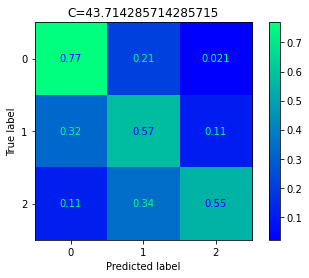

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       133
           1       0.59      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14306840664281872

SVM - RBF, Train Accuracy = 0.8858483189992181, C=49.816326530612244
Test Accuracy = 0.65


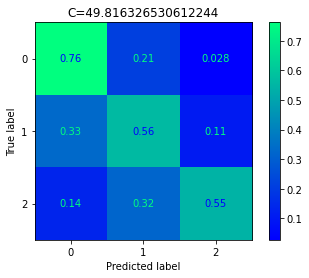

              precision    recall  f1-score   support

           0       0.63      0.56      0.60       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09190831151701684

SVM - RBF, Train Accuracy = 0.8921032056293979, C=55.91836734693877
Test Accuracy = 0.65


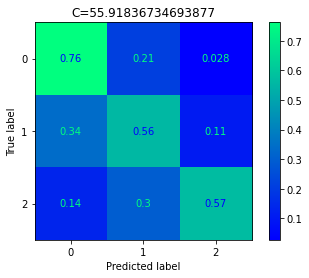

              precision    recall  f1-score   support

           0       0.63      0.56      0.59       133
           1       0.58      0.57      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09190831151701684

SVM - RBF, Train Accuracy = 0.8960125097732604, C=62.0204081632653
Test Accuracy = 0.64375


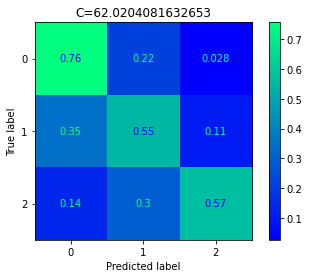

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       133
           1       0.58      0.57      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0791182877355664

SVM - RBF, Train Accuracy = 0.9030492572322126, C=68.12244897959184
Test Accuracy = 0.65


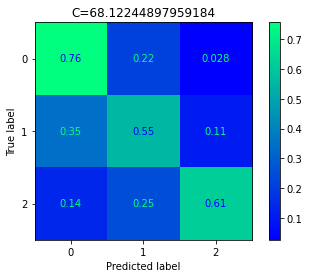

              precision    recall  f1-score   support

           0       0.63      0.55      0.59       133
           1       0.60      0.61      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09190831151701684

SVM - RBF, Train Accuracy = 0.9053948397185301, C=74.22448979591837
Test Accuracy = 0.653125


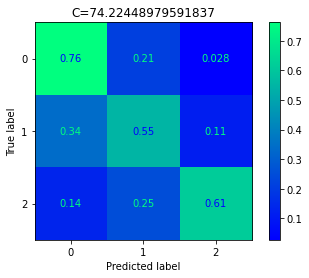

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09830332340774206

SVM - RBF, Train Accuracy = 0.9069585613760751, C=80.3265306122449
Test Accuracy = 0.653125


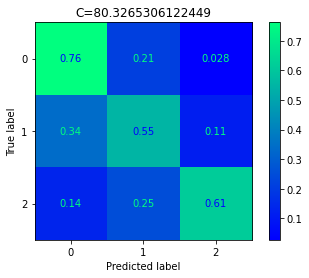

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09830332340774206

SVM - RBF, Train Accuracy = 0.9108678655199375, C=86.42857142857143
Test Accuracy = 0.65625


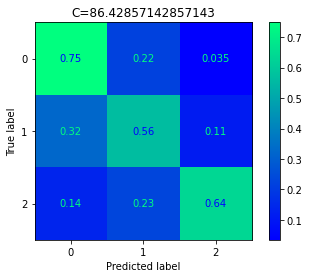

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       133
           1       0.58      0.64      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08551329962629162

SVM - RBF, Train Accuracy = 0.9116497263487099, C=92.53061224489795
Test Accuracy = 0.653125


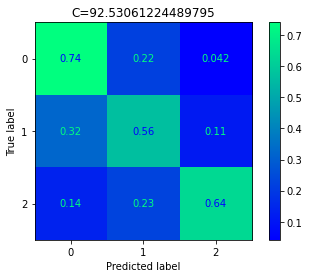

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       133
           1       0.57      0.64      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05993325206339062

SVM - RBF, Train Accuracy = 0.9139953088350273, C=98.63265306122449
Test Accuracy = 0.646875


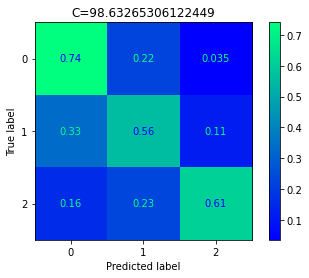

              precision    recall  f1-score   support

           0       0.64      0.56      0.59       133
           1       0.57      0.61      0.59        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.047143228281940175

SVM - RBF, Train Accuracy = 0.9179046129788898, C=104.73469387755102
Test Accuracy = 0.6375


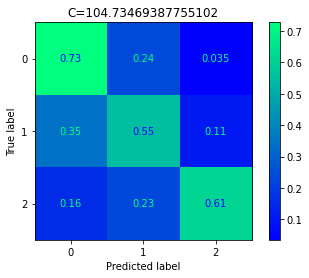

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.02795819260976451

SVM - RBF, Train Accuracy = 0.9202501954652071, C=110.83673469387755
Test Accuracy = 0.64375


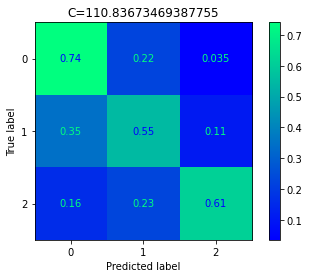

              precision    recall  f1-score   support

           0       0.63      0.55      0.59       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04074821639121495

SVM - RBF, Train Accuracy = 0.9225957779515246, C=116.93877551020408
Test Accuracy = 0.640625


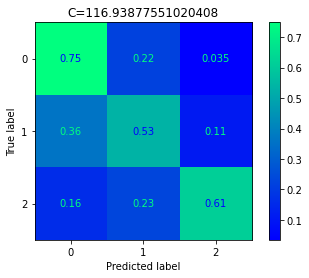

              precision    recall  f1-score   support

           0       0.63      0.53      0.58       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03435320450048973

SVM - RBF, Train Accuracy = 0.9272869429241595, C=123.0408163265306
Test Accuracy = 0.65


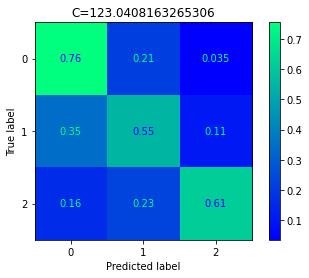

              precision    recall  f1-score   support

           0       0.65      0.55      0.59       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0535382401726654

SVM - RBF, Train Accuracy = 0.9288506645817045, C=129.14285714285714
Test Accuracy = 0.653125


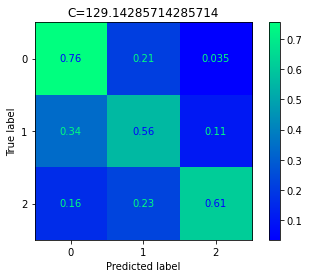

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05993325206339062

SVM - RBF, Train Accuracy = 0.9304143862392494, C=135.24489795918367
Test Accuracy = 0.653125


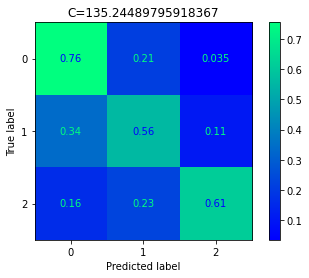

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05993325206339062

SVM - RBF, Train Accuracy = 0.9351055512118843, C=141.3469387755102
Test Accuracy = 0.65


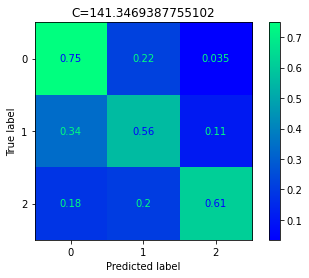

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03435320450048973

SVM - RBF, Train Accuracy = 0.9366692728694292, C=147.44897959183675
Test Accuracy = 0.65


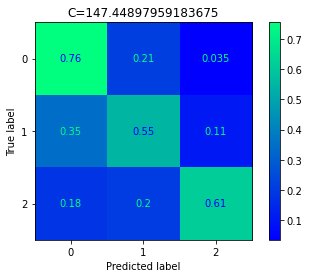

              precision    recall  f1-score   support

           0       0.65      0.55      0.60       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03435320450048973

SVM - RBF, Train Accuracy = 0.9382329945269742, C=153.55102040816325
Test Accuracy = 0.65


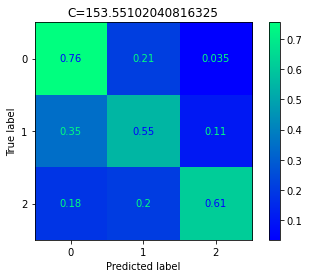

              precision    recall  f1-score   support

           0       0.65      0.55      0.60       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03435320450048973

SVM - RBF, Train Accuracy = 0.9390148553557467, C=159.6530612244898
Test Accuracy = 0.653125


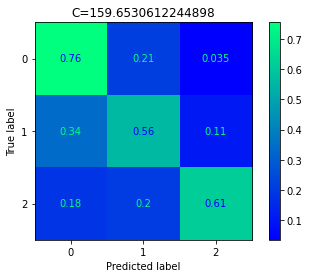

              precision    recall  f1-score   support

           0       0.65      0.56      0.60       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04074821639121495

SVM - RBF, Train Accuracy = 0.9421422986708365, C=165.75510204081633
Test Accuracy = 0.659375


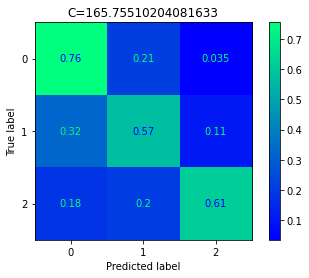

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0535382401726654

SVM - RBF, Train Accuracy = 0.9429241594996091, C=171.85714285714286
Test Accuracy = 0.659375


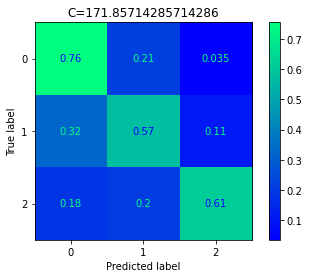

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0535382401726654

SVM - RBF, Train Accuracy = 0.944487881157154, C=177.9591836734694
Test Accuracy = 0.65625


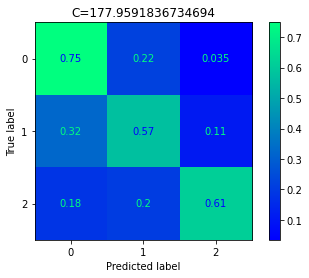

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.047143228281940175

SVM - RBF, Train Accuracy = 0.9452697419859265, C=184.0612244897959
Test Accuracy = 0.659375


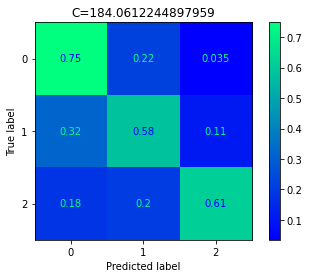

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0535382401726654

SVM - RBF, Train Accuracy = 0.947615324472244, C=190.16326530612244
Test Accuracy = 0.6625


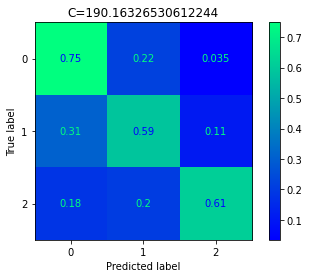

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05993325206339062

SVM - RBF, Train Accuracy = 0.9499609069585614, C=196.26530612244898
Test Accuracy = 0.6625


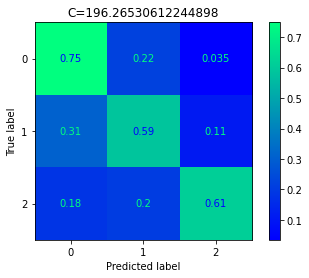

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05993325206339062

SVM - RBF, Train Accuracy = 0.9515246286161063, C=202.3673469387755
Test Accuracy = 0.659375


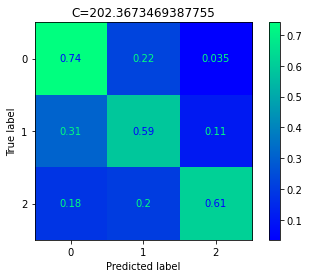

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.0535382401726654

SVM - RBF, Train Accuracy = 0.9530883502736512, C=208.46938775510205
Test Accuracy = 0.65625


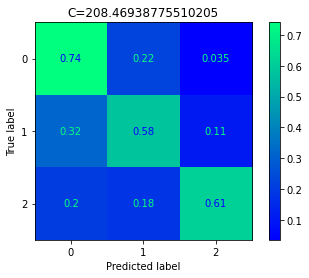

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.02795819260976451

SVM - RBF, Train Accuracy = 0.9530883502736512, C=214.57142857142856
Test Accuracy = 0.65625


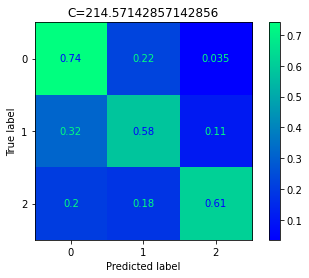

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.02795819260976451

SVM - RBF, Train Accuracy = 0.9530883502736512, C=220.6734693877551
Test Accuracy = 0.65625


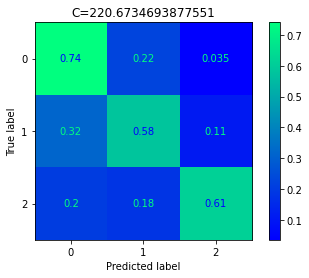

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.02795819260976451

SVM - RBF, Train Accuracy = 0.9538702111024238, C=226.77551020408163
Test Accuracy = 0.659375


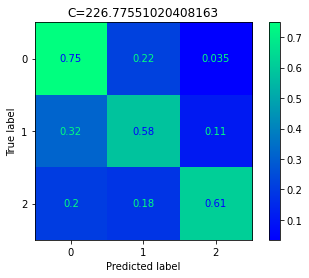

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       133
           1       0.59      0.61      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.03435320450048973

SVM - RBF, Train Accuracy = 0.9546520719311963, C=232.87755102040816
Test Accuracy = 0.6625


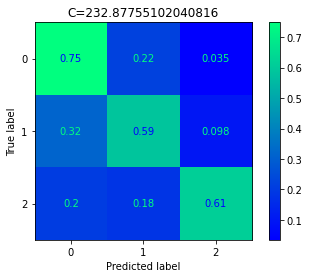

              precision    recall  f1-score   support

           0       0.67      0.59      0.62       133
           1       0.60      0.61      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04074821639121495

SVM - RBF, Train Accuracy = 0.9562157935887412, C=238.9795918367347
Test Accuracy = 0.6625


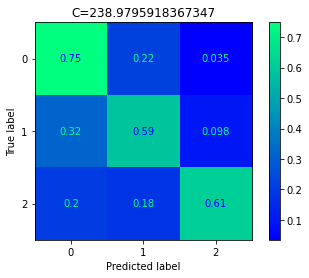

              precision    recall  f1-score   support

           0       0.67      0.59      0.62       133
           1       0.60      0.61      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04074821639121495

SVM - RBF, Train Accuracy = 0.9593432369038312, C=245.0816326530612
Test Accuracy = 0.6625


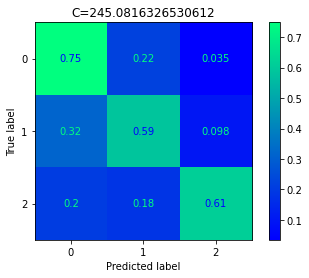

              precision    recall  f1-score   support

           0       0.67      0.59      0.62       133
           1       0.60      0.61      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04074821639121495

SVM - RBF, Train Accuracy = 0.9593432369038312, C=251.18367346938774
Test Accuracy = 0.66875


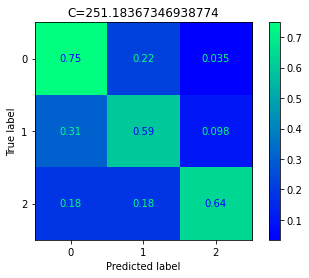

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       133
           1       0.61      0.64      0.62        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07272327584484117

SVM - RBF, Train Accuracy = 0.9601250977326036, C=257.2857142857143
Test Accuracy = 0.66875


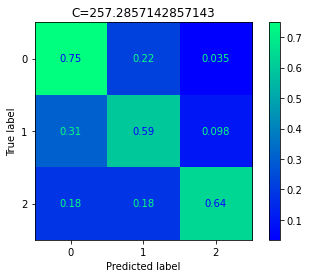

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       133
           1       0.61      0.64      0.62        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07272327584484117

SVM - RBF, Train Accuracy = 0.9609069585613761, C=263.3877551020408
Test Accuracy = 0.665625


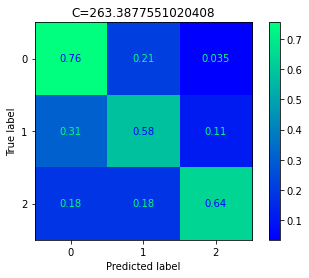

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       133
           1       0.58      0.64      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06632826395411584

SVM - RBF, Train Accuracy = 0.9616888193901486, C=269.48979591836735
Test Accuracy = 0.665625


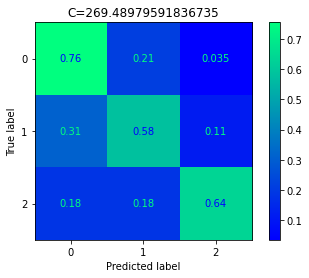

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       133
           1       0.58      0.64      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06632826395411584

SVM - RBF, Train Accuracy = 0.962470680218921, C=275.59183673469386
Test Accuracy = 0.665625


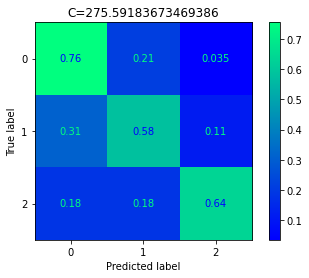

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       133
           1       0.58      0.64      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06632826395411584

SVM - RBF, Train Accuracy = 0.9632525410476935, C=281.6938775510204
Test Accuracy = 0.6625


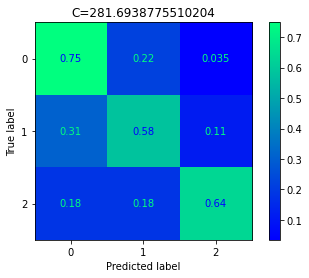

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       133
           1       0.58      0.64      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05993325206339062

SVM - RBF, Train Accuracy = 0.9632525410476935, C=287.7959183673469
Test Accuracy = 0.66875


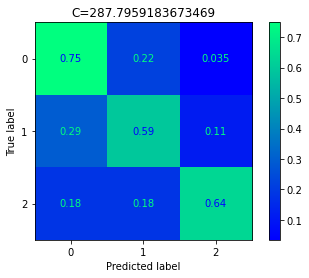

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       133
           1       0.58      0.64      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07272327584484117

SVM - RBF, Train Accuracy = 0.9640344018764659, C=293.8979591836735
Test Accuracy = 0.66875


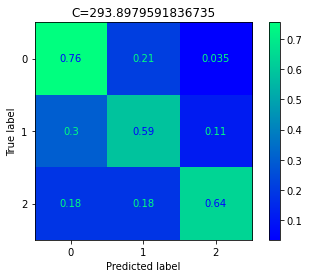

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       133
           1       0.58      0.64      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07272327584484117

SVM - RBF, Train Accuracy = 0.9640344018764659, C=300.0
Test Accuracy = 0.66875


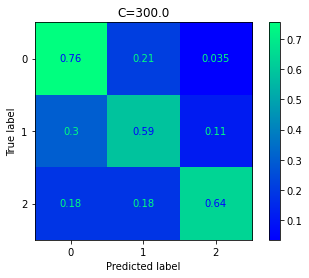

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       133
           1       0.58      0.64      0.61        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07272327584484117



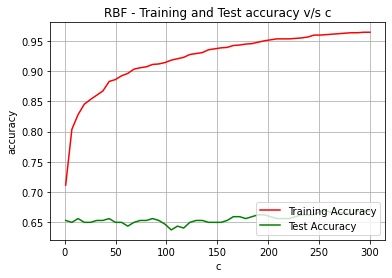

SVM - Poly, Train Accuracy = 0.5903049257232212, C=0.1
Test Accuracy = 0.56875


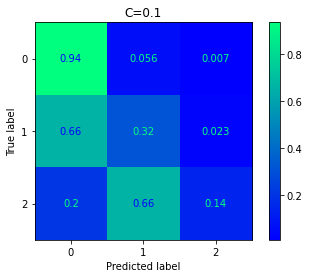

              precision    recall  f1-score   support

           0       0.53      0.32      0.40       133
           1       0.60      0.14      0.22        44
           2       0.00      0.00      0.00         0
		 R2 Score: -0.07436199764183926

SVM - Poly, Train Accuracy = 0.7513682564503519, C=6.220408163265305
Test Accuracy = 0.646875


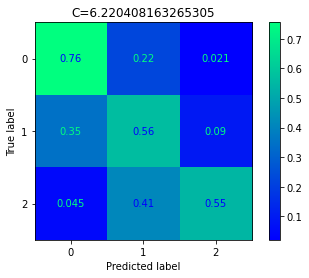

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.62      0.55      0.58        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18143847798717005

SVM - Poly, Train Accuracy = 0.7693510555121188, C=12.34081632653061
Test Accuracy = 0.659375


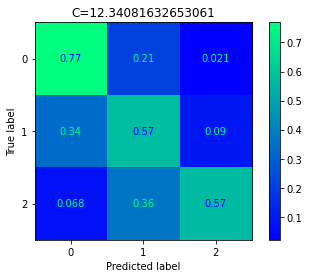

              precision    recall  f1-score   support

           0       0.62      0.57      0.60       133
           1       0.62      0.57      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18783348987789528

SVM - Poly, Train Accuracy = 0.7849882720875684, C=18.461224489795917
Test Accuracy = 0.64375


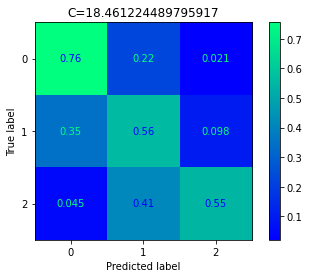

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.60      0.55      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17504346609644483

SVM - Poly, Train Accuracy = 0.7935887412040656, C=24.581632653061224
Test Accuracy = 0.65


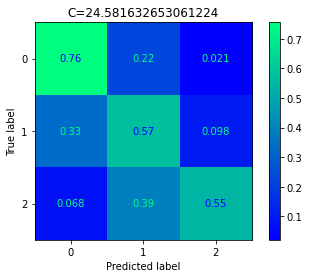

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       133
           1       0.60      0.55      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1686484542057196

SVM - Poly, Train Accuracy = 0.7920250195465207, C=30.70204081632653
Test Accuracy = 0.65625


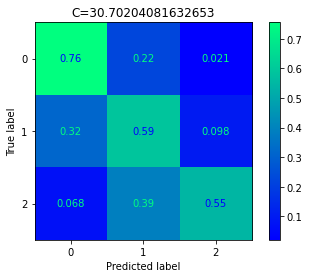

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       133
           1       0.60      0.55      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18143847798717005

SVM - Poly, Train Accuracy = 0.799061767005473, C=36.82244897959183
Test Accuracy = 0.659375


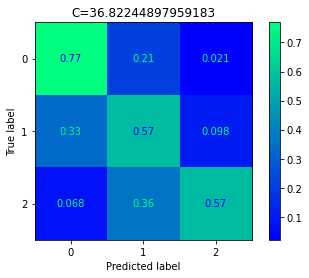

              precision    recall  f1-score   support

           0       0.62      0.57      0.60       133
           1       0.61      0.57      0.59        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18783348987789528

SVM - Poly, Train Accuracy = 0.8037529319781079, C=42.94285714285714
Test Accuracy = 0.659375


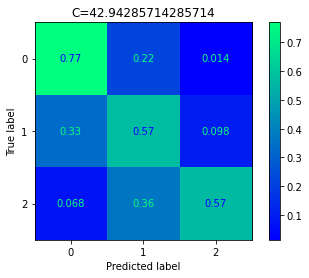

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       133
           1       0.62      0.57      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20701852555007105

SVM - Poly, Train Accuracy = 0.8053166536356529, C=49.063265306122446
Test Accuracy = 0.6625


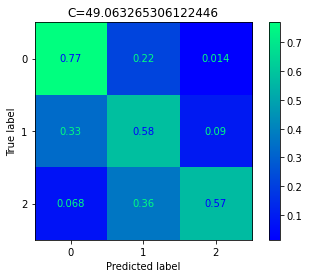

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       133
           1       0.64      0.57      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.21341353744079627

SVM - Poly, Train Accuracy = 0.8076622361219703, C=55.18367346938775
Test Accuracy = 0.65


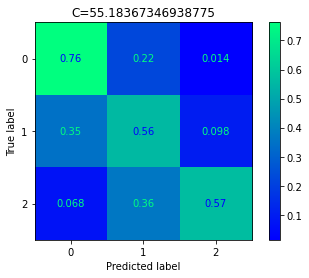

              precision    recall  f1-score   support

           0       0.61      0.56      0.58       133
           1       0.62      0.57      0.60        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18783348987789528

SVM - Poly, Train Accuracy = 0.8107896794370602, C=61.30408163265306
Test Accuracy = 0.64375


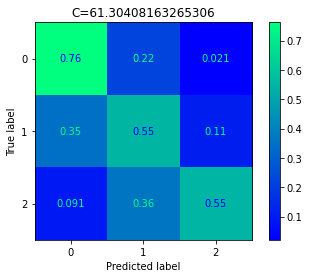

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       133
           1       0.59      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1366733947520935

SVM - Poly, Train Accuracy = 0.815480844409695, C=67.42448979591836
Test Accuracy = 0.64375


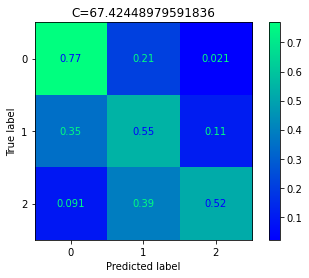

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       133
           1       0.57      0.52      0.55        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1366733947520935

SVM - Poly, Train Accuracy = 0.8193901485535575, C=73.54489795918366
Test Accuracy = 0.640625


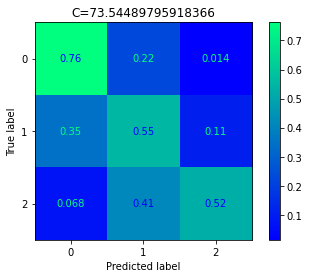

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       133
           1       0.59      0.52      0.55        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1686484542057196

SVM - Poly, Train Accuracy = 0.818608287724785, C=79.66530612244897
Test Accuracy = 0.634375


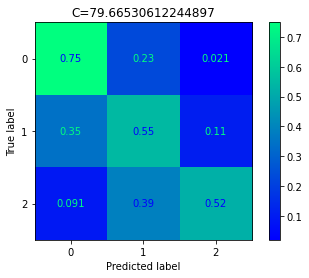

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       133
           1       0.57      0.52      0.55        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11748835907991773

SVM - Poly, Train Accuracy = 0.8232994526974199, C=85.78571428571428
Test Accuracy = 0.6375


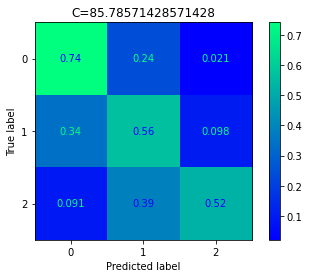

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.59      0.52      0.55        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12388337097064295

SVM - Poly, Train Accuracy = 0.8272087568412823, C=91.90612244897957
Test Accuracy = 0.634375


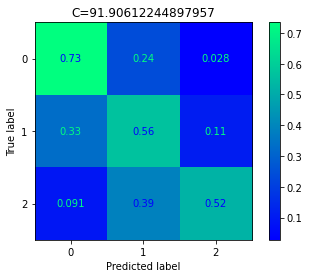

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.56      0.52      0.54        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09830332340774206

SVM - Poly, Train Accuracy = 0.8264268960125097, C=98.02653061224488
Test Accuracy = 0.634375


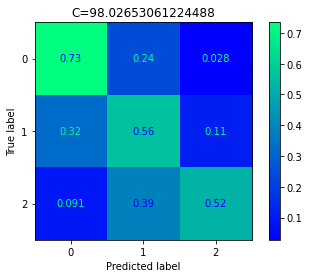

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.55      0.52      0.53        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09830332340774206

SVM - Poly, Train Accuracy = 0.8256450351837373, C=104.1469387755102
Test Accuracy = 0.63125


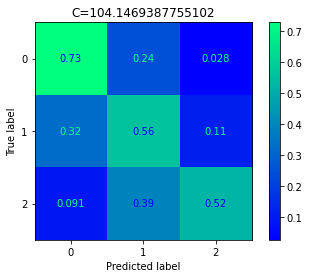

              precision    recall  f1-score   support

           0       0.59      0.56      0.58       133
           1       0.55      0.52      0.53        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09190831151701684

SVM - Poly, Train Accuracy = 0.8256450351837373, C=110.26734693877549
Test Accuracy = 0.64375


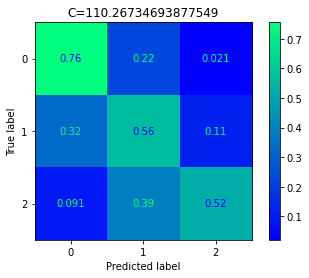

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.56      0.52      0.54        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1366733947520935

SVM - Poly, Train Accuracy = 0.8248631743549648, C=116.3877551020408
Test Accuracy = 0.640625


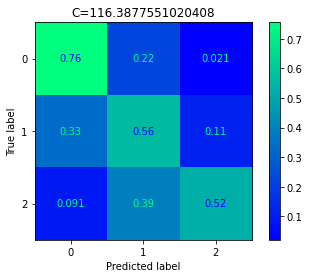

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.56      0.52      0.54        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Poly, Train Accuracy = 0.8248631743549648, C=122.50816326530611
Test Accuracy = 0.64375


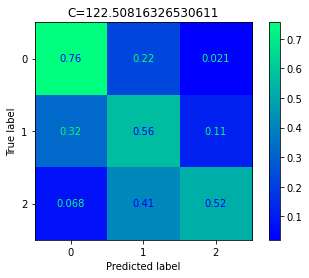

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.56      0.52      0.54        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15585843042426917

SVM - Poly, Train Accuracy = 0.8264268960125097, C=128.6285714285714
Test Accuracy = 0.646875


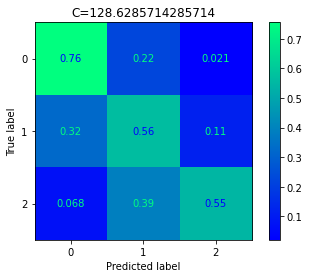

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1622534423149944

SVM - Poly, Train Accuracy = 0.8295543393275997, C=134.74897959183673
Test Accuracy = 0.646875


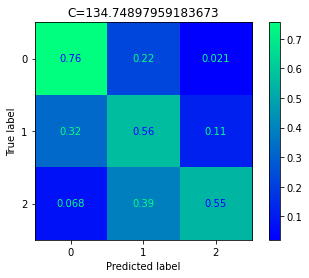

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1622534423149944

SVM - Poly, Train Accuracy = 0.8303362001563722, C=140.86938775510203
Test Accuracy = 0.646875


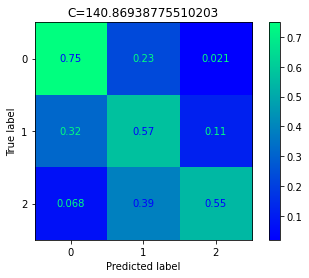

              precision    recall  f1-score   support

           0       0.60      0.57      0.59       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1622534423149944

SVM - Poly, Train Accuracy = 0.8318999218139171, C=146.98979591836732
Test Accuracy = 0.65


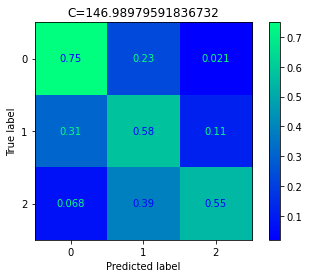

              precision    recall  f1-score   support

           0       0.61      0.58      0.59       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1686484542057196

SVM - Poly, Train Accuracy = 0.8358092259577795, C=153.11020408163265
Test Accuracy = 0.646875


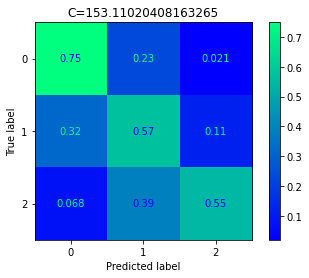

              precision    recall  f1-score   support

           0       0.60      0.57      0.59       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1622534423149944

SVM - Poly, Train Accuracy = 0.8358092259577795, C=159.23061224489794
Test Accuracy = 0.65


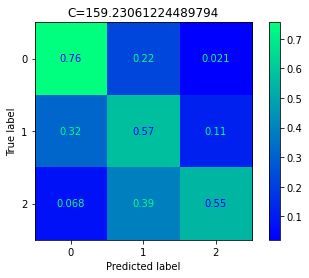

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1686484542057196

SVM - Poly, Train Accuracy = 0.836591086786552, C=165.35102040816324
Test Accuracy = 0.64375


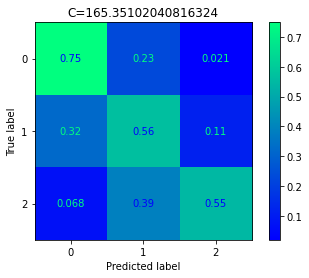

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15585843042426917

SVM - Poly, Train Accuracy = 0.8373729476153244, C=171.47142857142856
Test Accuracy = 0.646875


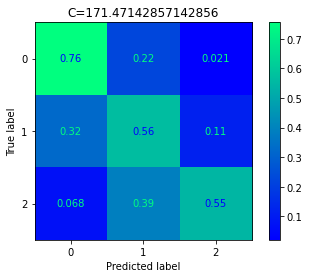

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1622534423149944

SVM - Poly, Train Accuracy = 0.8373729476153244, C=177.59183673469386
Test Accuracy = 0.646875


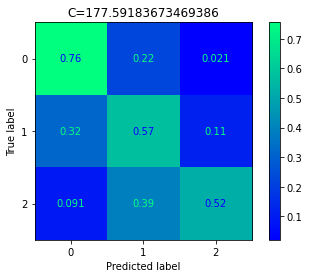

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       133
           1       0.56      0.52      0.54        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14306840664281872

SVM - Poly, Train Accuracy = 0.8397185301016419, C=183.71224489795915
Test Accuracy = 0.646875


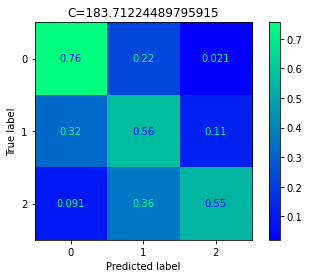

              precision    recall  f1-score   support

           0       0.61      0.56      0.59       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14306840664281872

SVM - Poly, Train Accuracy = 0.8405003909304144, C=189.83265306122448
Test Accuracy = 0.64375


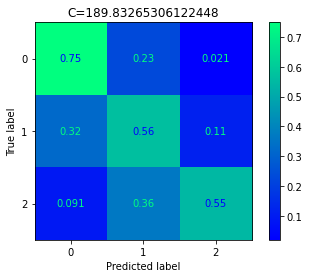

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1366733947520935

SVM - Poly, Train Accuracy = 0.8405003909304144, C=195.95306122448977
Test Accuracy = 0.640625


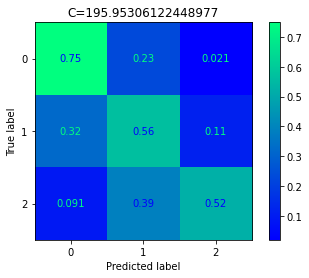

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.56      0.52      0.54        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Poly, Train Accuracy = 0.8412822517591869, C=202.07346938775507
Test Accuracy = 0.640625


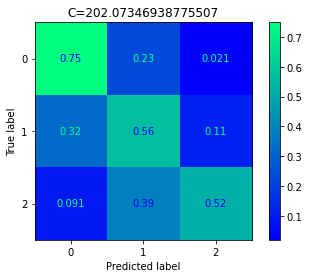

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       133
           1       0.56      0.52      0.54        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Poly, Train Accuracy = 0.8428459734167318, C=208.1938775510204
Test Accuracy = 0.646875


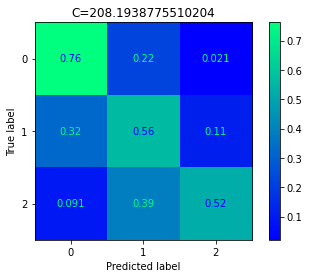

              precision    recall  f1-score   support

           0       0.61      0.56      0.59       133
           1       0.56      0.52      0.54        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14306840664281872

SVM - Poly, Train Accuracy = 0.8436278342455042, C=214.3142857142857
Test Accuracy = 0.65


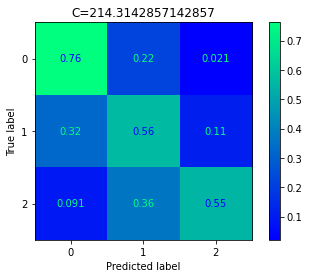

              precision    recall  f1-score   support

           0       0.61      0.56      0.59       133
           1       0.57      0.55      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14946341853354395

SVM - Poly, Train Accuracy = 0.8428459734167318, C=220.43469387755098
Test Accuracy = 0.65


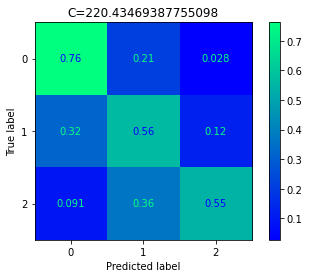

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       133
           1       0.55      0.55      0.55        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Poly, Train Accuracy = 0.8436278342455042, C=226.5551020408163
Test Accuracy = 0.65


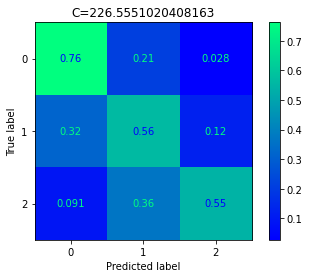

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       133
           1       0.55      0.55      0.55        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Poly, Train Accuracy = 0.8428459734167318, C=232.6755102040816
Test Accuracy = 0.65


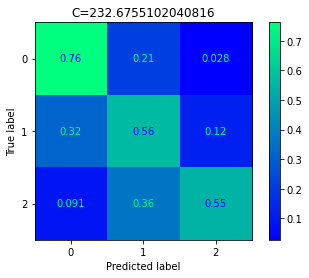

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       133
           1       0.55      0.55      0.55        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Poly, Train Accuracy = 0.8436278342455042, C=238.7959183673469
Test Accuracy = 0.646875


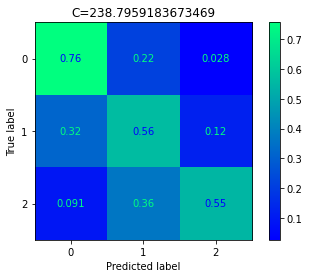

              precision    recall  f1-score   support

           0       0.61      0.56      0.59       133
           1       0.55      0.55      0.55        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12388337097064295

SVM - Poly, Train Accuracy = 0.8436278342455042, C=244.91632653061222
Test Accuracy = 0.646875


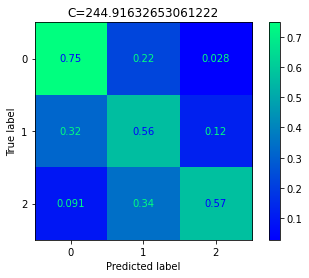

              precision    recall  f1-score   support

           0       0.61      0.56      0.59       133
           1       0.56      0.57      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12388337097064295

SVM - Poly, Train Accuracy = 0.8436278342455042, C=251.03673469387752
Test Accuracy = 0.65


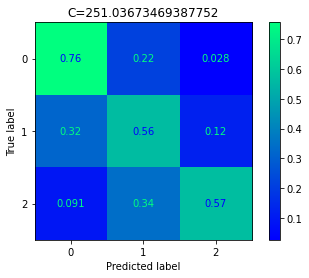

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       133
           1       0.56      0.57      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Poly, Train Accuracy = 0.8459734167318217, C=257.15714285714284
Test Accuracy = 0.653125


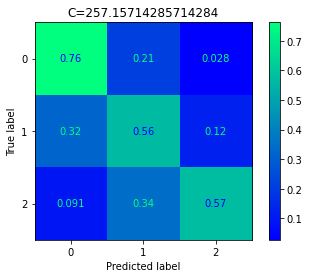

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       133
           1       0.56      0.57      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1366733947520935

SVM - Poly, Train Accuracy = 0.8451915559030493, C=263.27755102040817
Test Accuracy = 0.653125


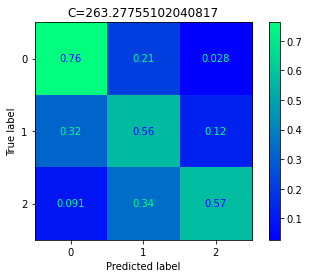

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       133
           1       0.56      0.57      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1366733947520935

SVM - Poly, Train Accuracy = 0.8451915559030493, C=269.3979591836735
Test Accuracy = 0.653125


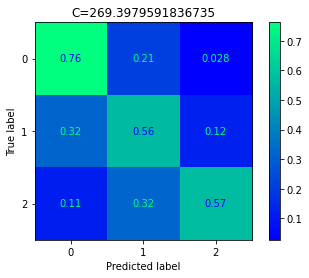

              precision    recall  f1-score   support

           0       0.63      0.56      0.60       133
           1       0.56      0.57      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11748835907991773

SVM - Poly, Train Accuracy = 0.8451915559030493, C=275.51836734693876
Test Accuracy = 0.653125


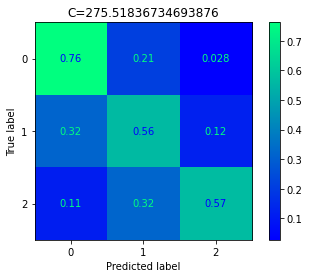

              precision    recall  f1-score   support

           0       0.63      0.56      0.60       133
           1       0.56      0.57      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11748835907991773

SVM - Poly, Train Accuracy = 0.8459734167318217, C=281.6387755102041
Test Accuracy = 0.65625


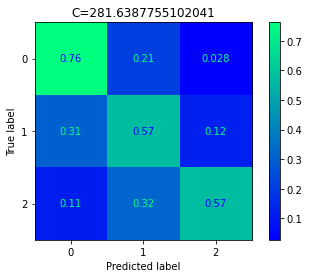

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       133
           1       0.56      0.57      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12388337097064295

SVM - Poly, Train Accuracy = 0.8475371383893667, C=287.7591836734694
Test Accuracy = 0.65625


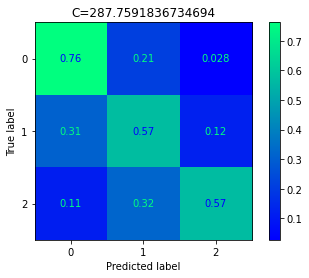

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       133
           1       0.56      0.57      0.56        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.12388337097064295

SVM - Poly, Train Accuracy = 0.8491008600469117, C=293.8795918367347
Test Accuracy = 0.659375


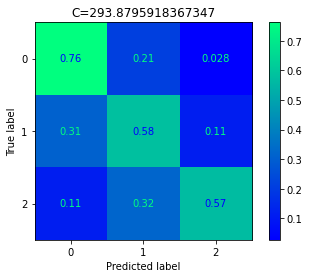

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       133
           1       0.57      0.57      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.13027838286136828

SVM - Poly, Train Accuracy = 0.8522283033620016, C=300.0
Test Accuracy = 0.6625


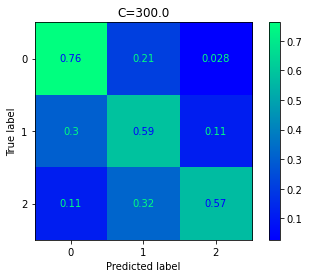

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       133
           1       0.57      0.57      0.57        44
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1366733947520935



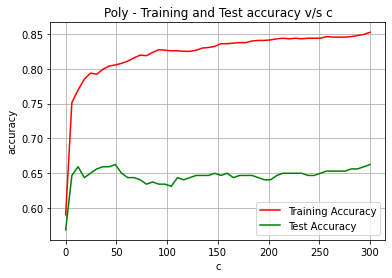

In [134]:
# num_of_different_c = 16
c_svm_linear = np.linspace(0.06, 500.0)#, num=num_of_different_c)
c_svm_rbf = np.linspace(1, 300)#, num=num_of_different_c)
c_svm_poly = np.linspace(0.1, 300)#, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train White Wines Data

In [135]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_white)

Original y hist: (array([   0,    0,    0,   20,  163, 1457, 2198,  880,  180]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([1640, 2198, 1060]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (4898, 12)
y[:10]:
[-1.  1. -1.  1.  0.  0.  0. -1.  1. -1.]
X[:10, :]:
[[6.7000e+00 2.7000e-01 3.1000e-01 1.5700e+01 3.6000e-02 4.4000e+01
  1.7900e+02 9.9790e-01 3.2600e+00 5.6000e-01 9.6000e+00]
 [6.9000e+00 1.9000e-01 3.1000e-01 1.9250e+01 4.3000e-02 3.8000e+01
  1.6700e+02 9.9954e-01 2.9300e+00 5.2000e-01 9.1000e+00]
 [7.0000e+00 5.7000e-01 1.0000e-01 8.3000e+00 9.4000e-02 2.3000e+01
  1.8800e+02 9.9720e-01 3.4000e+00 4.7000e-01 9.2000e+00]
 [6.2000e+00 3.6000e-01 3.2000e-01 4.0000e+00 3.6000e-02 4.4000e+01
  9.2000e+01 9.8936e-01 3.2000e+00 5.0000e-01 1.3300e+01]
 [6.8000e+00 1.9000e-01 3.3000e-01 4.9000e+00 4.7000e-02 4.2000e+01
  1.3000e+02 9.9283e-01 3.1200e+00 5.6000e-01 1.1000e+01]
 [6.2000e+00 2.1000e-01 2.4000e-01 1.2000e+00

SVM - Linear, Train Accuracy = 0.5548749361919346, C=0.06
Test Accuracy = 0.5622448979591836


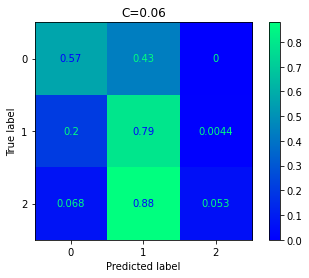

              precision    recall  f1-score   support

           0       0.53      0.79      0.63       452
           1       0.85      0.05      0.10       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08497276209053961

SVM - Linear, Train Accuracy = 0.5796324655436447, C=10.262857142857143
Test Accuracy = 0.5653061224489796


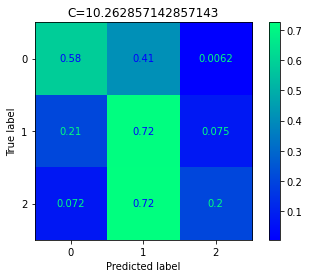

              precision    recall  f1-score   support

           0       0.54      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07331636415538723

SVM - Linear, Train Accuracy = 0.5788667687595712, C=20.465714285714284
Test Accuracy = 0.5642857142857143


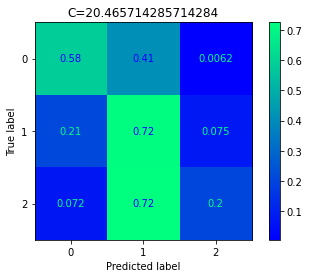

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=30.66857142857143
Test Accuracy = 0.5642857142857143


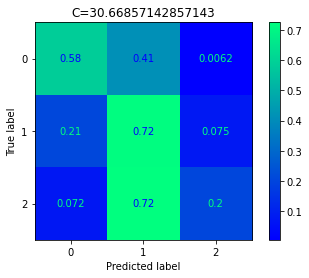

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=40.871428571428574
Test Accuracy = 0.5642857142857143


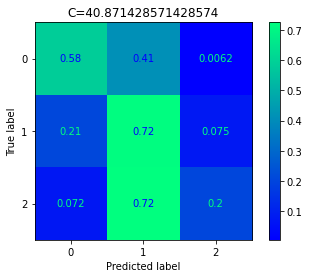

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=51.074285714285715
Test Accuracy = 0.5642857142857143


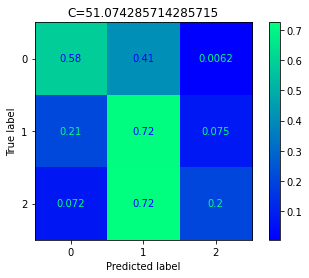

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5783563042368556, C=61.27714285714286
Test Accuracy = 0.5642857142857143


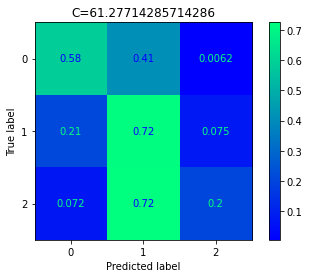

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=71.48
Test Accuracy = 0.5642857142857143


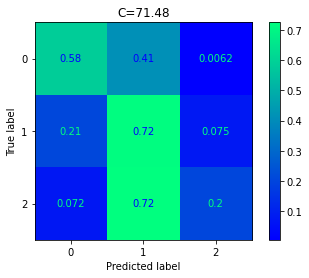

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=81.68285714285715
Test Accuracy = 0.5642857142857143


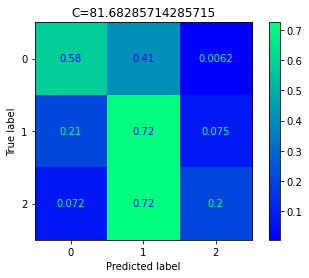

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=91.88571428571429
Test Accuracy = 0.5642857142857143


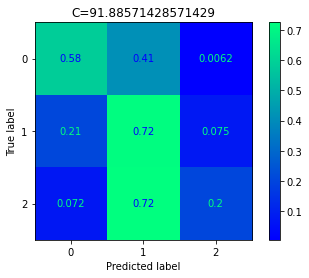

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=102.08857142857143
Test Accuracy = 0.5642857142857143


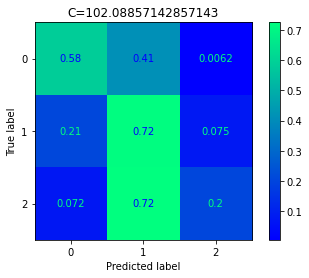

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5781010719754976, C=112.29142857142857
Test Accuracy = 0.5642857142857143


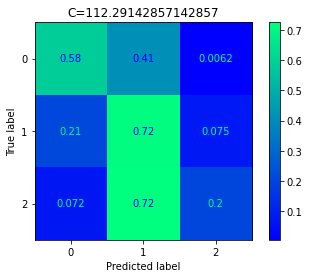

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=122.49428571428572
Test Accuracy = 0.5642857142857143


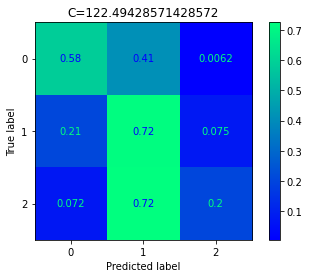

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=132.69714285714286
Test Accuracy = 0.5642857142857143


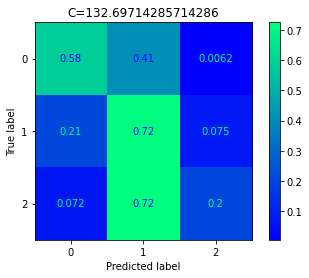

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=142.9
Test Accuracy = 0.5642857142857143


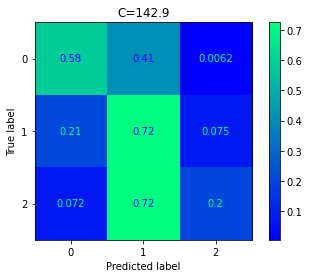

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=153.10285714285715
Test Accuracy = 0.5642857142857143


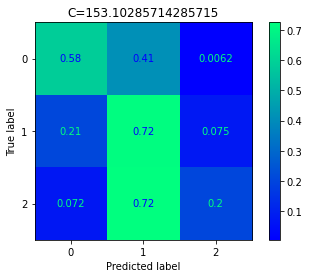

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=163.3057142857143
Test Accuracy = 0.5642857142857143


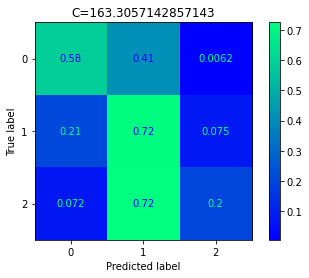

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5783563042368556, C=173.50857142857143
Test Accuracy = 0.5642857142857143


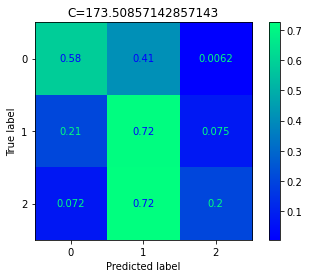

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=183.71142857142857
Test Accuracy = 0.5642857142857143


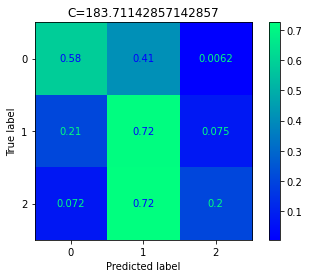

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=193.9142857142857
Test Accuracy = 0.5642857142857143


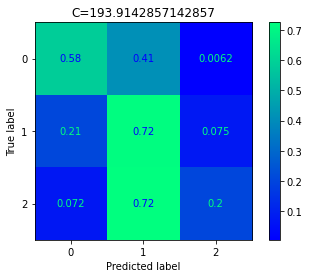

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=204.11714285714285
Test Accuracy = 0.5642857142857143


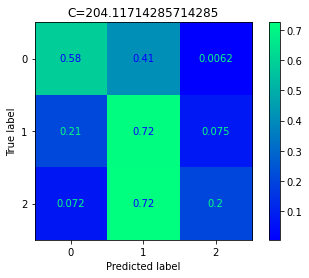

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5788667687595712, C=214.32
Test Accuracy = 0.5642857142857143


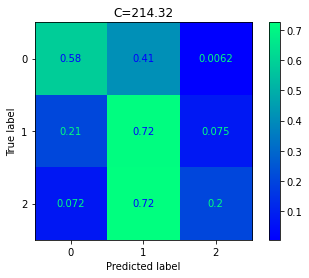

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=224.52285714285713
Test Accuracy = 0.5642857142857143


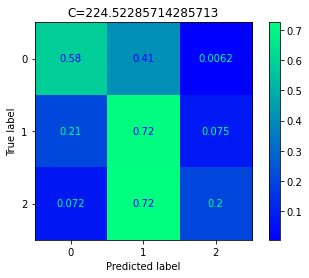

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5786115364982134, C=234.72571428571428
Test Accuracy = 0.5642857142857143


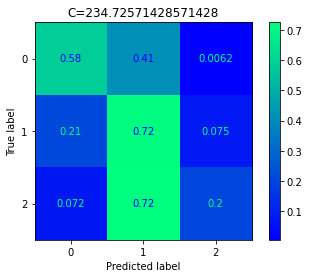

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.579122001020929, C=244.92857142857144
Test Accuracy = 0.5642857142857143


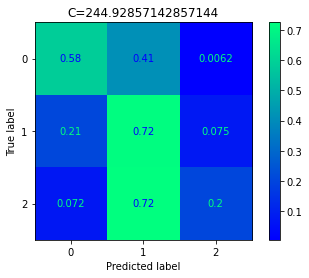

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=255.1314285714286
Test Accuracy = 0.5642857142857143


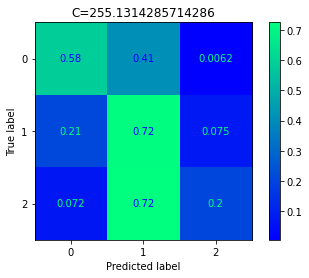

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.579122001020929, C=265.3342857142857
Test Accuracy = 0.5642857142857143


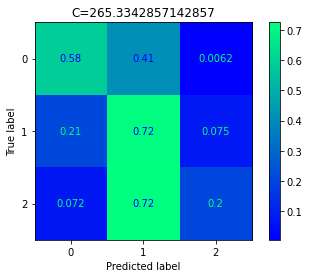

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=275.53714285714284
Test Accuracy = 0.5642857142857143


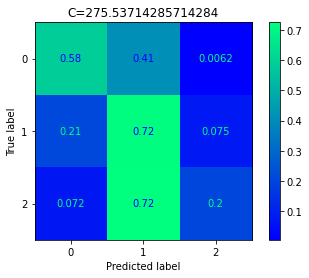

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.579122001020929, C=285.74
Test Accuracy = 0.5642857142857143


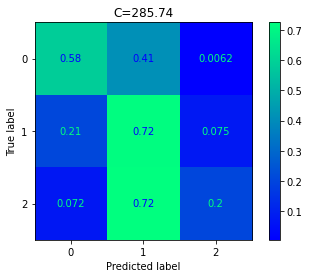

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5796324655436447, C=295.9428571428571
Test Accuracy = 0.5642857142857143


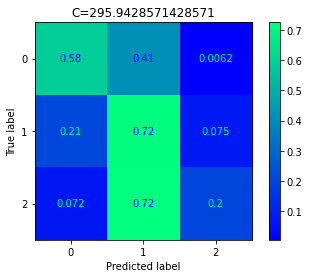

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=306.1457142857143
Test Accuracy = 0.5642857142857143


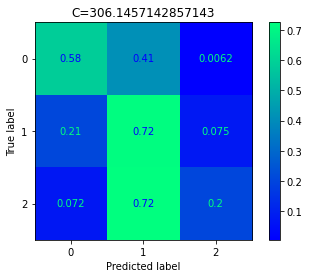

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.579122001020929, C=316.3485714285714
Test Accuracy = 0.5642857142857143


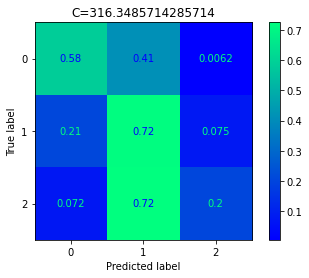

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=326.5514285714286
Test Accuracy = 0.5642857142857143


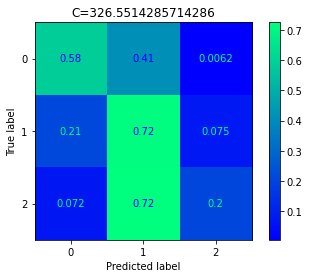

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=336.75428571428574
Test Accuracy = 0.5642857142857143


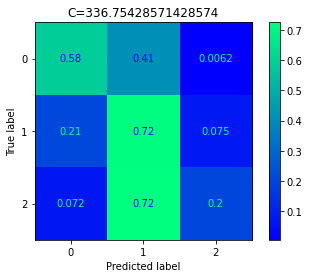

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=346.95714285714286
Test Accuracy = 0.5642857142857143


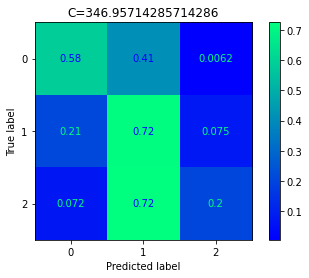

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5796324655436447, C=357.16
Test Accuracy = 0.5642857142857143


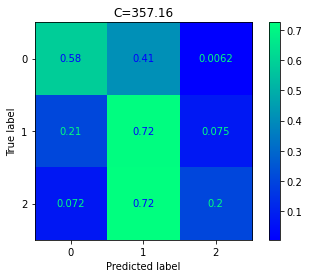

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5796324655436447, C=367.36285714285714
Test Accuracy = 0.5642857142857143


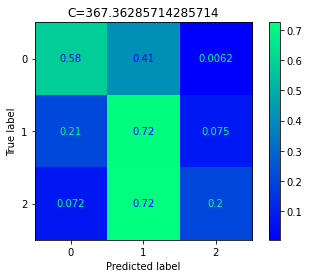

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=377.5657142857143
Test Accuracy = 0.5642857142857143


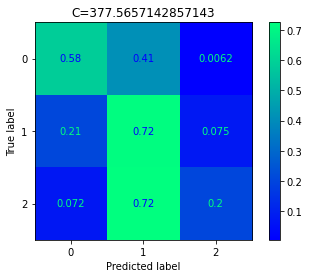

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=387.7685714285714
Test Accuracy = 0.5642857142857143


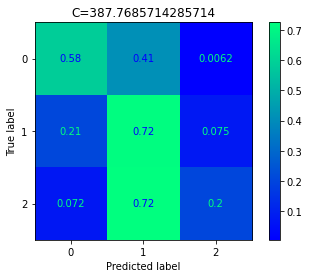

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=397.9714285714286
Test Accuracy = 0.5642857142857143


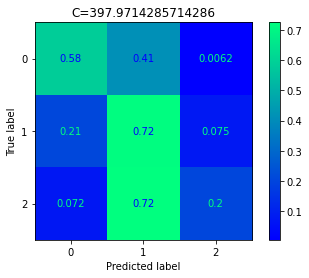

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=408.1742857142857
Test Accuracy = 0.5642857142857143


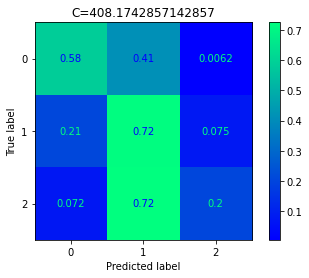

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=418.37714285714287
Test Accuracy = 0.5642857142857143


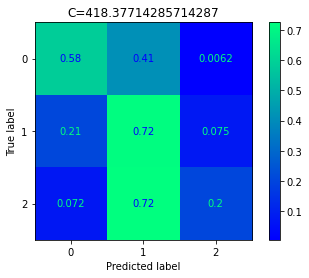

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5798876978050026, C=428.58
Test Accuracy = 0.5642857142857143


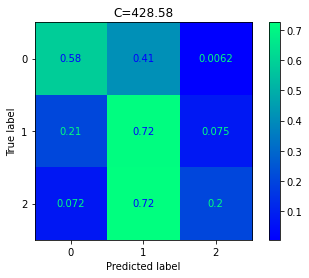

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5798876978050026, C=438.78285714285715
Test Accuracy = 0.5642857142857143


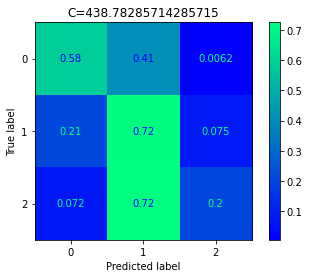

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5798876978050026, C=448.98571428571427
Test Accuracy = 0.5653061224489796


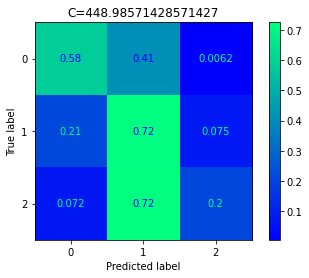

              precision    recall  f1-score   support

           0       0.54      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07331636415538723

SVM - Linear, Train Accuracy = 0.5793772332822869, C=459.18857142857144
Test Accuracy = 0.5642857142857143


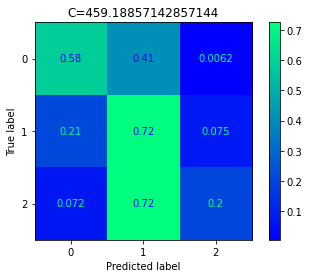

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=469.39142857142855
Test Accuracy = 0.5642857142857143


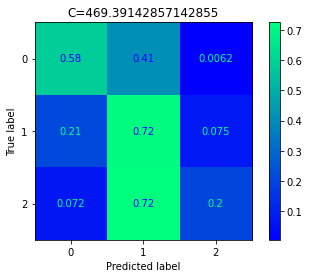

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=479.5942857142857
Test Accuracy = 0.5642857142857143


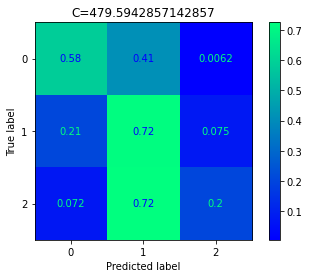

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5798876978050026, C=489.7971428571429
Test Accuracy = 0.5642857142857143


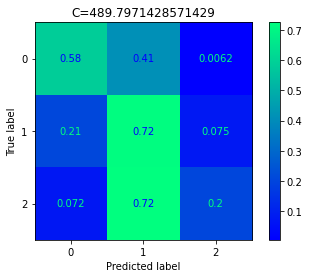

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Linear, Train Accuracy = 0.5793772332822869, C=500.0
Test Accuracy = 0.5642857142857143


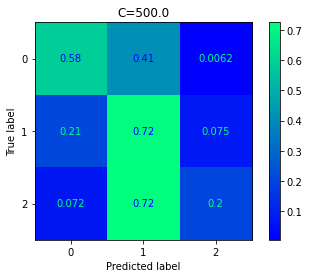

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.54      0.20      0.29       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522



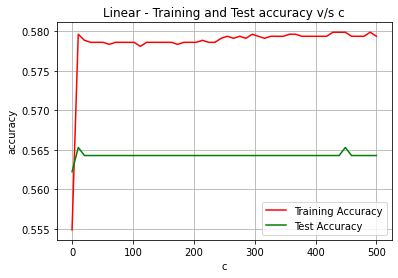

SVM - RBF, Train Accuracy = 0.6710056151097499, C=1.0
Test Accuracy = 0.6051020408163266


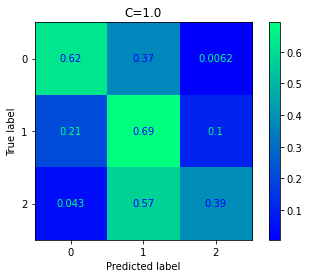

              precision    recall  f1-score   support

           0       0.57      0.69      0.62       452
           1       0.63      0.39      0.48       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18405214453933472

SVM - RBF, Train Accuracy = 0.7480857580398163, C=7.1020408163265305
Test Accuracy = 0.6265306122448979


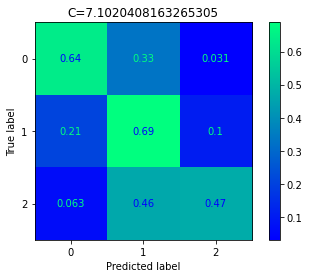

              precision    recall  f1-score   support

           0       0.61      0.69      0.64       452
           1       0.63      0.47      0.54       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1549111497014538

SVM - RBF, Train Accuracy = 0.7792240939254722, C=13.204081632653061
Test Accuracy = 0.6275510204081632


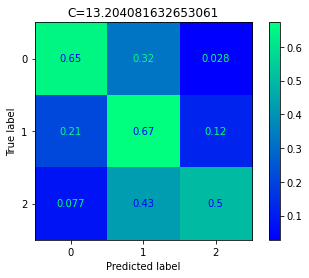

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       452
           1       0.62      0.50      0.55       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14519748475549354

SVM - RBF, Train Accuracy = 0.7986217457886677, C=19.306122448979593
Test Accuracy = 0.6357142857142857


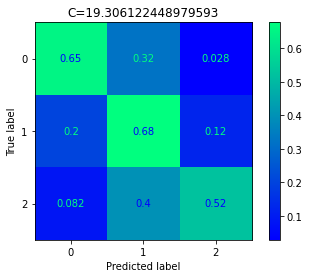

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       452
           1       0.63      0.52      0.57       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1549111497014538

SVM - RBF, Train Accuracy = 0.8108728943338438, C=25.408163265306122
Test Accuracy = 0.6377551020408163


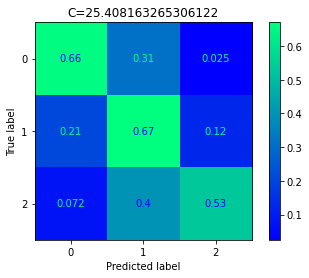

              precision    recall  f1-score   support

           0       0.62      0.67      0.65       452
           1       0.64      0.53      0.58       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17628121258256646

SVM - RBF, Train Accuracy = 0.8233792751403778, C=31.51020408163265
Test Accuracy = 0.6448979591836734


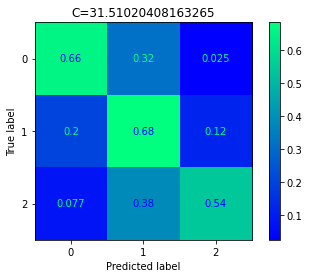

              precision    recall  f1-score   support

           0       0.63      0.68      0.66       452
           1       0.65      0.54      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18405214453933472

SVM - RBF, Train Accuracy = 0.8320571720265442, C=37.61224489795919
Test Accuracy = 0.65


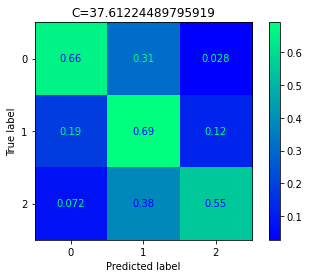

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       452
           1       0.63      0.55      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19376580948529498

SVM - RBF, Train Accuracy = 0.8384379785604901, C=43.714285714285715
Test Accuracy = 0.6489795918367347


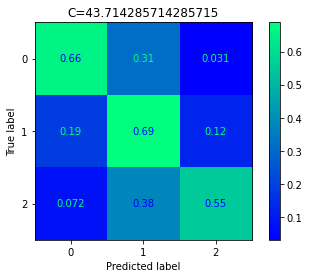

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       452
           1       0.63      0.55      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18599487752852673

SVM - RBF, Train Accuracy = 0.8453292496171516, C=49.816326530612244
Test Accuracy = 0.6479591836734694


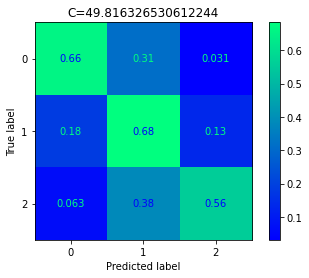

              precision    recall  f1-score   support

           0       0.63      0.68      0.66       452
           1       0.62      0.56      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1957085424744871

SVM - RBF, Train Accuracy = 0.8511995916283819, C=55.91836734693877
Test Accuracy = 0.6448979591836734


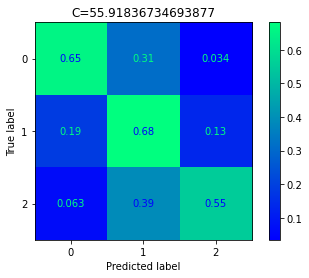

              precision    recall  f1-score   support

           0       0.63      0.68      0.66       452
           1       0.62      0.55      0.58       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18405214453933472

SVM - RBF, Train Accuracy = 0.8586013272077591, C=62.0204081632653
Test Accuracy = 0.6459183673469387


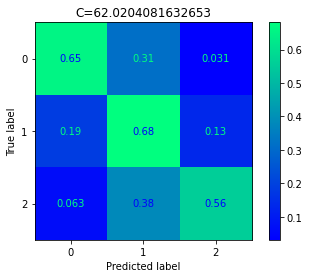

              precision    recall  f1-score   support

           0       0.63      0.68      0.66       452
           1       0.62      0.56      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19182307649610297

SVM - RBF, Train Accuracy = 0.864982133741705, C=68.12244897959184
Test Accuracy = 0.6479591836734694


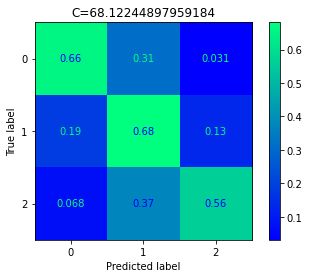

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       452
           1       0.62      0.56      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18988034350691085

SVM - RBF, Train Accuracy = 0.8708524757529351, C=74.22448979591837
Test Accuracy = 0.6489795918367347


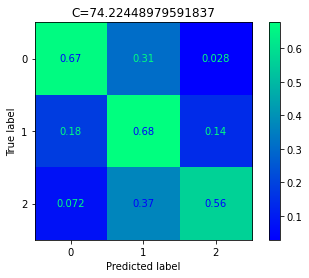

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       452
           1       0.62      0.56      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19182307649610297

SVM - RBF, Train Accuracy = 0.8754466564573762, C=80.3265306122449
Test Accuracy = 0.6520408163265307


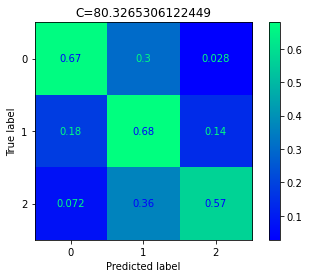

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       452
           1       0.62      0.57      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1976512754636791

SVM - RBF, Train Accuracy = 0.878764675855028, C=86.42857142857143
Test Accuracy = 0.6510204081632653


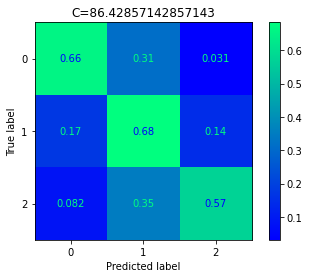

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       452
           1       0.61      0.57      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17822394557175858

SVM - RBF, Train Accuracy = 0.8823379275140377, C=92.53061224489795
Test Accuracy = 0.6520408163265307


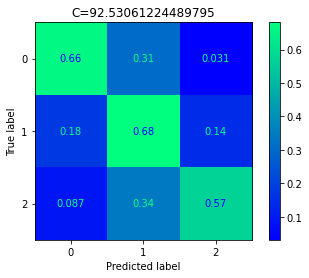

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       452
           1       0.61      0.57      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17433847959337445

SVM - RBF, Train Accuracy = 0.886676875957121, C=98.63265306122449
Test Accuracy = 0.6479591836734694


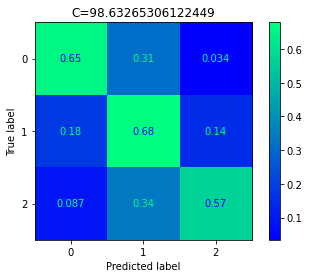

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       452
           1       0.61      0.57      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16073934866902995

SVM - RBF, Train Accuracy = 0.8879530372639102, C=104.73469387755102
Test Accuracy = 0.6479591836734694


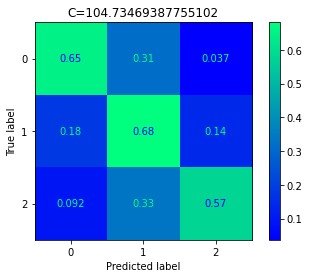

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       452
           1       0.61      0.57      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14908295073387767

SVM - RBF, Train Accuracy = 0.892802450229709, C=110.83673469387755
Test Accuracy = 0.6479591836734694


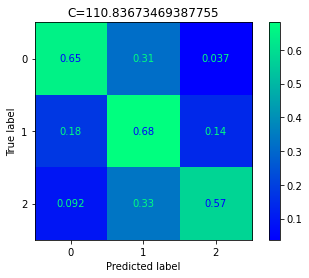

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       452
           1       0.61      0.57      0.59       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14908295073387767

SVM - RBF, Train Accuracy = 0.8945890760592139, C=116.93877551020408
Test Accuracy = 0.6520408163265307


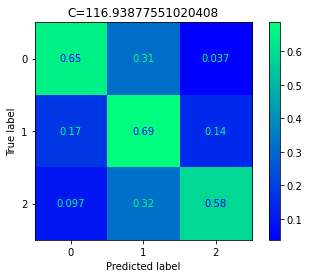

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       452
           1       0.62      0.58      0.60       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15102568372306968

SVM - RBF, Train Accuracy = 0.8963757018887187, C=123.0408163265306
Test Accuracy = 0.6520408163265307


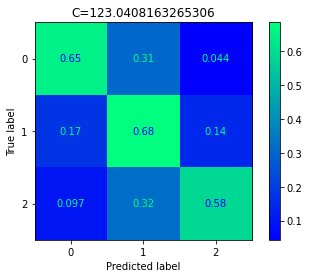

              precision    recall  f1-score   support

           0       0.65      0.68      0.67       452
           1       0.61      0.58      0.60       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1393692857879173

SVM - RBF, Train Accuracy = 0.8984175599795814, C=129.14285714285714
Test Accuracy = 0.6551020408163265


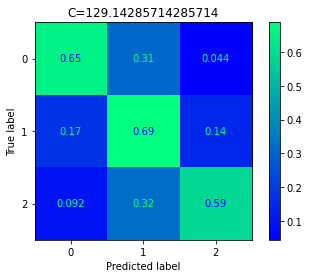

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       452
           1       0.61      0.59      0.60       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15102568372306968

SVM - RBF, Train Accuracy = 0.9009698825931598, C=135.24489795918367
Test Accuracy = 0.6581632653061225


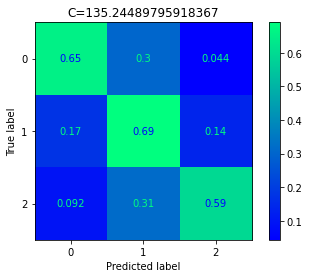

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       452
           1       0.62      0.59      0.61       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15685388269064582

SVM - RBF, Train Accuracy = 0.9027565084226646, C=141.3469387755102
Test Accuracy = 0.6581632653061225


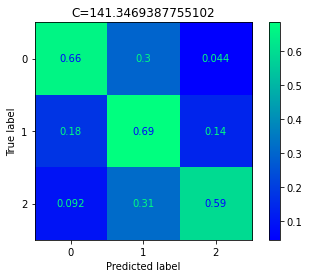

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       452
           1       0.62      0.59      0.61       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15685388269064582

SVM - RBF, Train Accuracy = 0.9040326697294538, C=147.44897959183675
Test Accuracy = 0.6602040816326531


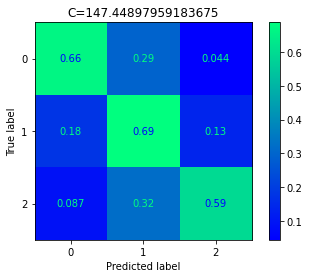

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       452
           1       0.62      0.59      0.61       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1665675476366062

SVM - RBF, Train Accuracy = 0.90684022460439, C=153.55102040816325
Test Accuracy = 0.6571428571428571


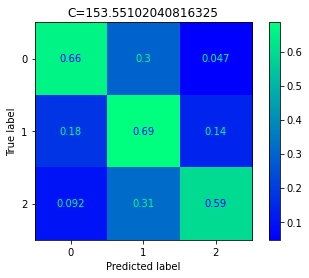

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       452
           1       0.61      0.59      0.60       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.14908295073387767

SVM - RBF, Train Accuracy = 0.9076059213884635, C=159.6530612244898
Test Accuracy = 0.6602040816326531


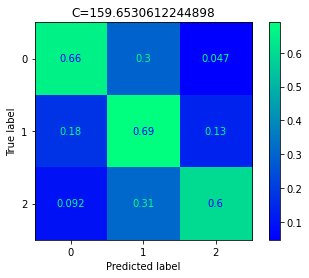

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       452
           1       0.62      0.60      0.61       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1549111497014538

SVM - RBF, Train Accuracy = 0.9091373149566105, C=165.75510204081633
Test Accuracy = 0.6591836734693878


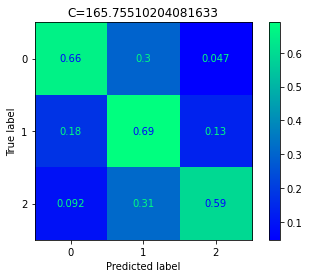

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       452
           1       0.62      0.59      0.61       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1529684167122617

SVM - RBF, Train Accuracy = 0.9111791730474732, C=171.85714285714286
Test Accuracy = 0.6591836734693878


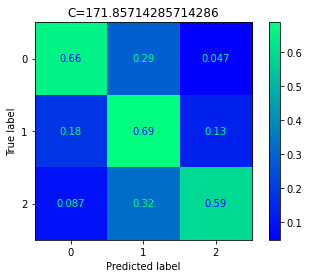

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       452
           1       0.62      0.59      0.61       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.15879661567983794

SVM - RBF, Train Accuracy = 0.9127105666156202, C=177.9591836734694
Test Accuracy = 0.6602040816326531


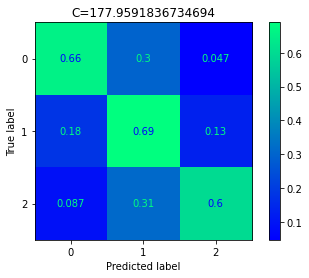

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       452
           1       0.63      0.60      0.61       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.16073934866902995

SVM - RBF, Train Accuracy = 0.9132210311383359, C=184.0612244897959
Test Accuracy = 0.6622448979591836


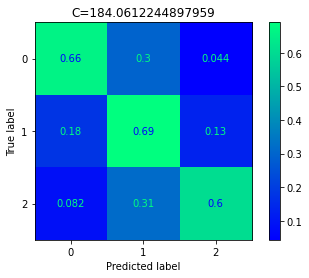

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       452
           1       0.63      0.60      0.62       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17628121258256646

SVM - RBF, Train Accuracy = 0.9152628892291985, C=190.16326530612244
Test Accuracy = 0.6653061224489796


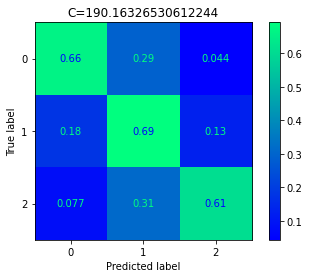

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       452
           1       0.64      0.61      0.62       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18793761051771884

SVM - RBF, Train Accuracy = 0.9160285860132721, C=196.26530612244898
Test Accuracy = 0.6632653061224489


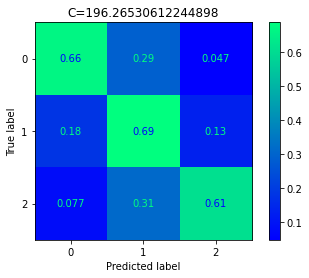

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       452
           1       0.63      0.61      0.62       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17822394557175858

SVM - RBF, Train Accuracy = 0.9167942827973455, C=202.3673469387755
Test Accuracy = 0.6663265306122449


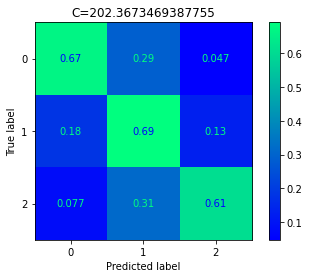

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.64      0.61      0.62       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18405214453933472

SVM - RBF, Train Accuracy = 0.9180704441041347, C=208.46938775510205
Test Accuracy = 0.6673469387755102


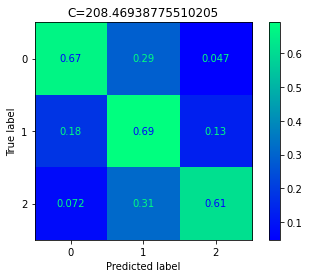

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.64      0.61      0.63       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19182307649610297

SVM - RBF, Train Accuracy = 0.9196018376722818, C=214.57142857142856
Test Accuracy = 0.6693877551020408


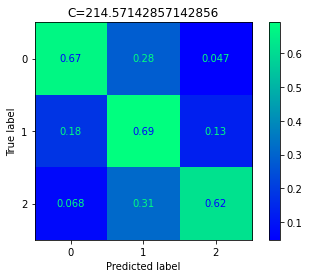

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.64      0.62      0.63       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20153674144206324

SVM - RBF, Train Accuracy = 0.9198570699336396, C=220.6734693877551
Test Accuracy = 0.6683673469387755


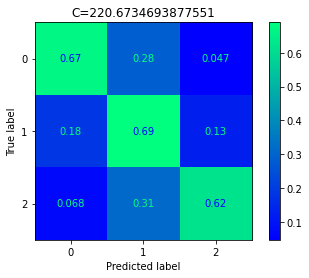

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.64      0.62      0.63       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19959400845287123

SVM - RBF, Train Accuracy = 0.9211332312404288, C=226.77551020408163
Test Accuracy = 0.6683673469387755


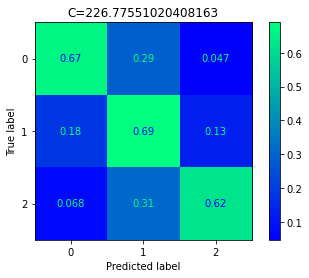

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.64      0.62      0.63       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19959400845287123

SVM - RBF, Train Accuracy = 0.9221541602858602, C=232.87755102040816
Test Accuracy = 0.6673469387755102


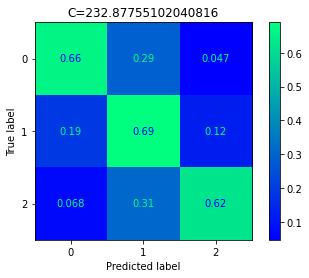

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.65      0.62      0.64       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1976512754636791

SVM - RBF, Train Accuracy = 0.9234303215926493, C=238.9795918367347
Test Accuracy = 0.6683673469387755


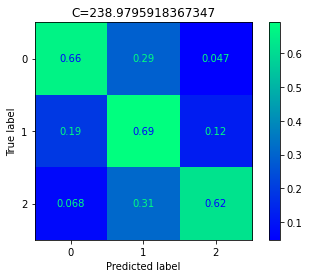

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.65      0.62      0.64       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19959400845287123

SVM - RBF, Train Accuracy = 0.923940786115365, C=245.0816326530612
Test Accuracy = 0.6693877551020408


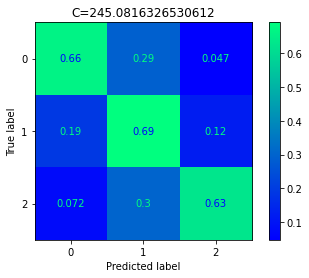

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.65      0.63      0.64       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1957085424744871

SVM - RBF, Train Accuracy = 0.9244512506380806, C=251.18367346938774
Test Accuracy = 0.6693877551020408


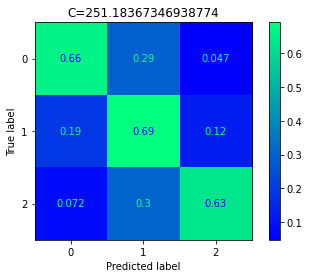

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.65      0.63      0.64       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1957085424744871

SVM - RBF, Train Accuracy = 0.9252169474221542, C=257.2857142857143
Test Accuracy = 0.6704081632653062


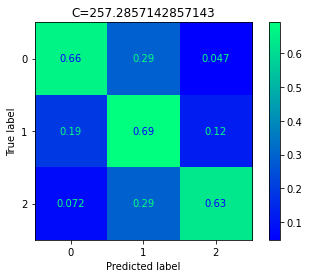

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.66      0.63      0.64       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1976512754636791

SVM - RBF, Train Accuracy = 0.9257274119448698, C=263.3877551020408
Test Accuracy = 0.6673469387755102


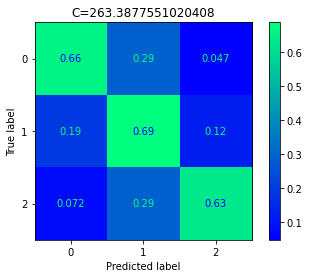

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.65      0.63      0.64       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19182307649610297

SVM - RBF, Train Accuracy = 0.9259826442062277, C=269.48979591836735
Test Accuracy = 0.6673469387755102


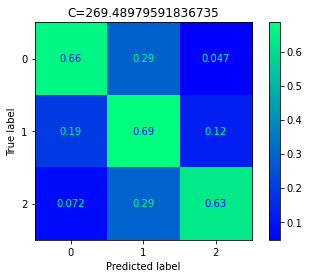

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.65      0.63      0.64       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19182307649610297

SVM - RBF, Train Accuracy = 0.9277692700357325, C=275.59183673469386
Test Accuracy = 0.6683673469387755


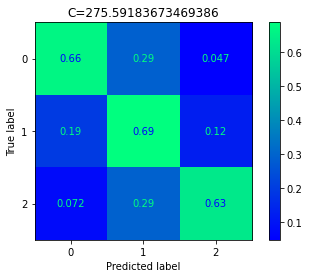

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.66      0.63      0.64       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19376580948529498

SVM - RBF, Train Accuracy = 0.9303215926493109, C=281.6938775510204
Test Accuracy = 0.6693877551020408


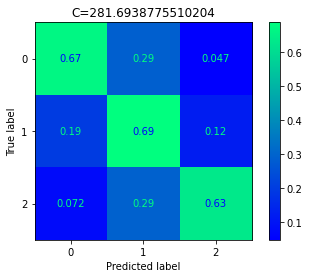

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.66      0.63      0.65       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1957085424744871

SVM - RBF, Train Accuracy = 0.9308320571720266, C=287.7959183673469
Test Accuracy = 0.6693877551020408


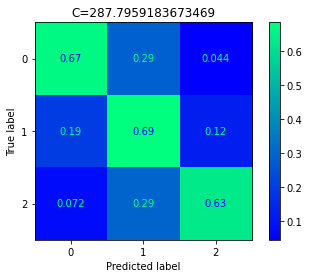

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.66      0.63      0.65       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20153674144206324

SVM - RBF, Train Accuracy = 0.9315977539561, C=293.8979591836735
Test Accuracy = 0.6704081632653062


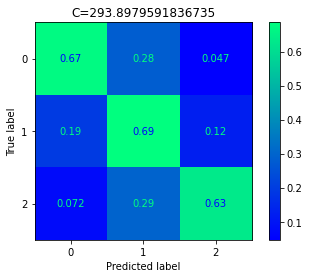

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       452
           1       0.65      0.63      0.64       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.1976512754636791

SVM - RBF, Train Accuracy = 0.9338948443083206, C=300.0
Test Accuracy = 0.6724489795918367


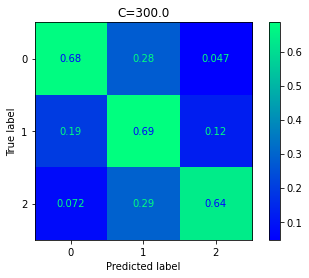

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       452
           1       0.66      0.64      0.65       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.20153674144206324



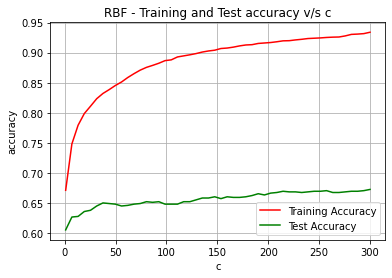

SVM - Poly, Train Accuracy = 0.5461970393057682, C=0.1
Test Accuracy = 0.5275510204081633


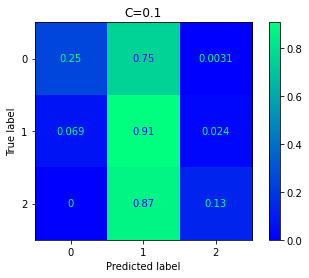

              precision    recall  f1-score   support

           0       0.49      0.91      0.64       452
           1       0.69      0.13      0.22       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09468642703649999

SVM - Poly, Train Accuracy = 0.6485451761102603, C=6.220408163265305
Test Accuracy = 0.5530612244897959


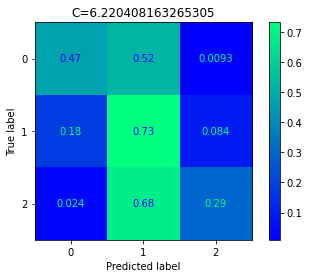

              precision    recall  f1-score   support

           0       0.52      0.73      0.61       452
           1       0.60      0.29      0.39       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10245735899326813

SVM - Poly, Train Accuracy = 0.6572230729964268, C=12.34081632653061
Test Accuracy = 0.5653061224489796


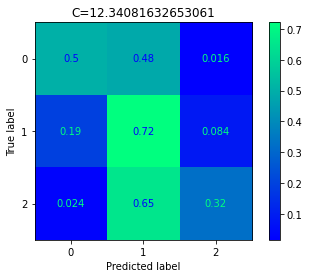

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       452
           1       0.61      0.32      0.42       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.11411375692842052

SVM - Poly, Train Accuracy = 0.6687085247575294, C=18.461224489795917
Test Accuracy = 0.560204081632653


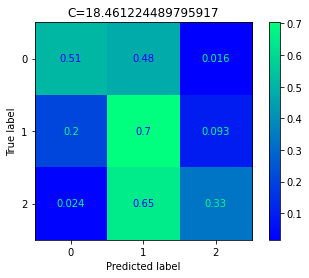

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       452
           1       0.59      0.33      0.42       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10440009198246025

SVM - Poly, Train Accuracy = 0.6704951505870342, C=24.581632653061224
Test Accuracy = 0.5622448979591836


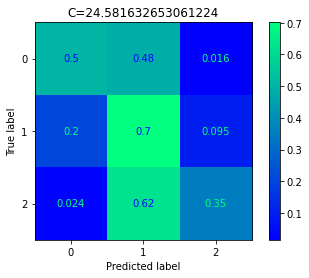

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       452
           1       0.60      0.35      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.10828555796084438

SVM - Poly, Train Accuracy = 0.6738131699846861, C=30.70204081632653
Test Accuracy = 0.5622448979591836


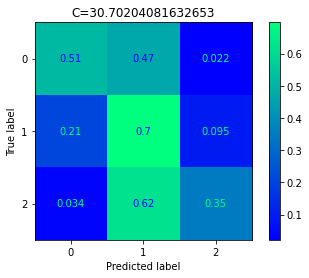

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       452
           1       0.59      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08497276209053961

SVM - Poly, Train Accuracy = 0.6743236345074017, C=36.82244897959183
Test Accuracy = 0.563265306122449


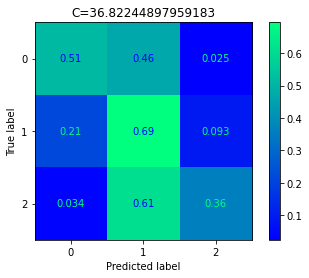

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       452
           1       0.60      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08108729611215548

SVM - Poly, Train Accuracy = 0.6761102603369066, C=42.94285714285714
Test Accuracy = 0.5642857142857143


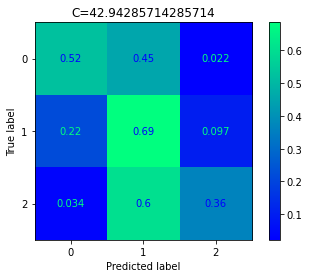

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       452
           1       0.60      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08885822806892374

SVM - Poly, Train Accuracy = 0.6753445635528331, C=49.063265306122446
Test Accuracy = 0.563265306122449


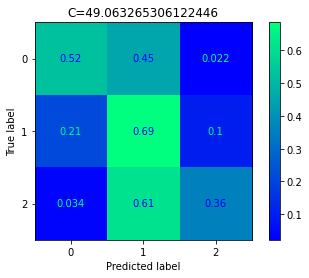

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       452
           1       0.59      0.36      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08691549507973173

SVM - Poly, Train Accuracy = 0.6799387442572741, C=55.18367346938775
Test Accuracy = 0.5622448979591836


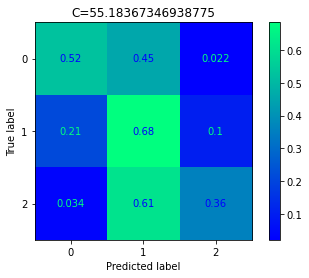

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.36      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.08497276209053961

SVM - Poly, Train Accuracy = 0.677131189382338, C=61.30408163265306
Test Accuracy = 0.560204081632653


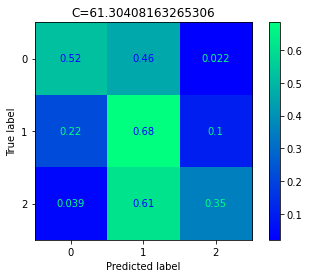

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07525909714457935

SVM - Poly, Train Accuracy = 0.6768759571209801, C=67.42448979591836
Test Accuracy = 0.5571428571428572


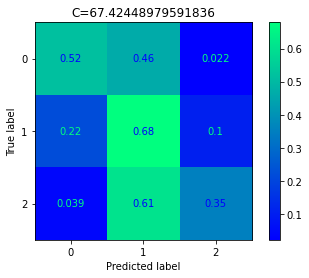

              precision    recall  f1-score   support

           0       0.53      0.68      0.59       452
           1       0.58      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06943089817700321

SVM - Poly, Train Accuracy = 0.6753445635528331, C=73.54489795918366
Test Accuracy = 0.5510204081632653


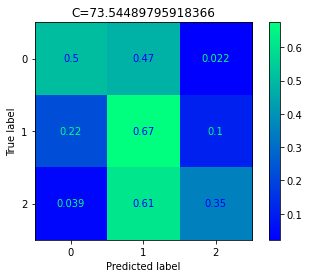

              precision    recall  f1-score   support

           0       0.52      0.67      0.59       452
           1       0.57      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.057774500241850824

SVM - Poly, Train Accuracy = 0.6768759571209801, C=79.66530612244897
Test Accuracy = 0.5551020408163265


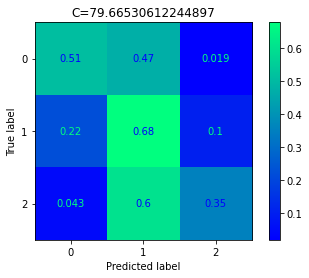

              precision    recall  f1-score   support

           0       0.53      0.68      0.59       452
           1       0.59      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06554543219861908

SVM - Poly, Train Accuracy = 0.6768759571209801, C=85.78571428571428
Test Accuracy = 0.5591836734693878


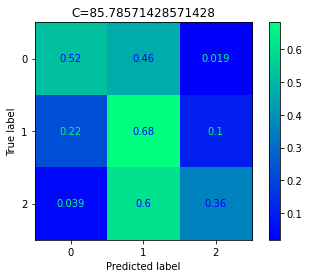

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07914456312296347

SVM - Poly, Train Accuracy = 0.677131189382338, C=91.90612244897957
Test Accuracy = 0.5591836734693878


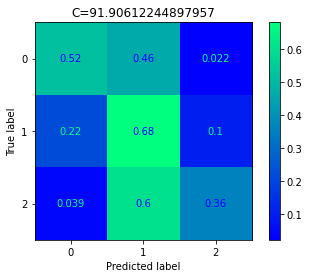

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.36      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07331636415538723

SVM - Poly, Train Accuracy = 0.6773864216436958, C=98.02653061224488
Test Accuracy = 0.5571428571428572


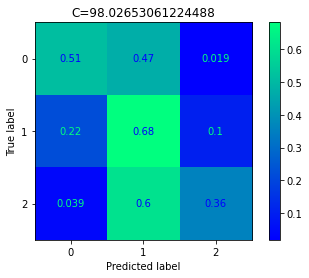

              precision    recall  f1-score   support

           0       0.53      0.68      0.59       452
           1       0.59      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07525909714457935

SVM - Poly, Train Accuracy = 0.6781521184277692, C=104.1469387755102
Test Accuracy = 0.5571428571428572


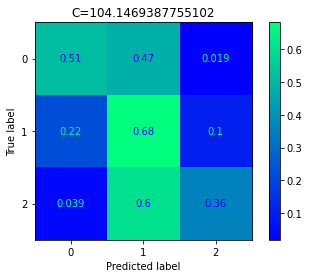

              precision    recall  f1-score   support

           0       0.53      0.68      0.59       452
           1       0.60      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07525909714457935

SVM - Poly, Train Accuracy = 0.678407350689127, C=110.26734693877549
Test Accuracy = 0.5571428571428572


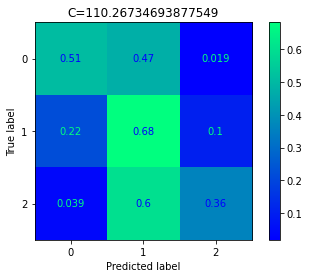

              precision    recall  f1-score   support

           0       0.53      0.68      0.59       452
           1       0.60      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07525909714457935

SVM - Poly, Train Accuracy = 0.6768759571209801, C=116.3877551020408
Test Accuracy = 0.5561224489795918


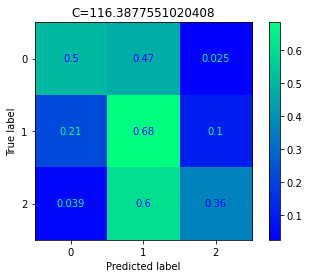

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06165996622023495

SVM - Poly, Train Accuracy = 0.6781521184277692, C=122.50816326530611
Test Accuracy = 0.5551020408163265


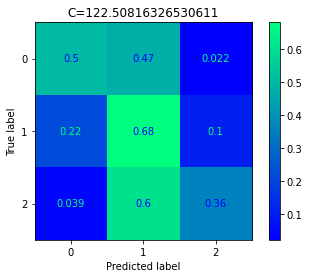

              precision    recall  f1-score   support

           0       0.53      0.68      0.59       452
           1       0.58      0.36      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06554543219861908

SVM - Poly, Train Accuracy = 0.6791730474732006, C=128.6285714285714
Test Accuracy = 0.5561224489795918


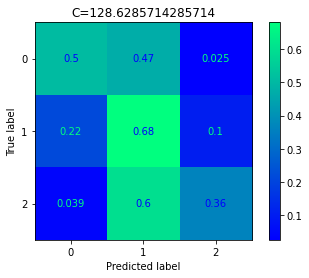

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06165996622023495

SVM - Poly, Train Accuracy = 0.678407350689127, C=134.74897959183673
Test Accuracy = 0.5571428571428572


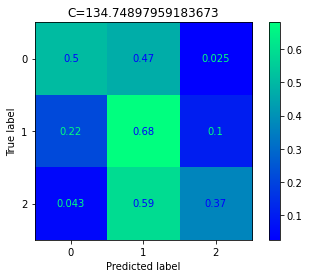

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.37      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.057774500241850824

SVM - Poly, Train Accuracy = 0.6789178152118428, C=140.86938775510203
Test Accuracy = 0.5561224489795918


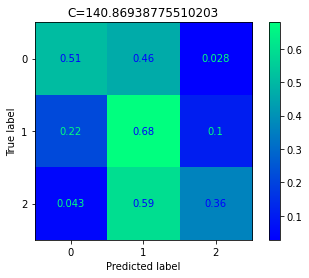

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.57      0.36      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05000356828508257

SVM - Poly, Train Accuracy = 0.6781521184277692, C=146.98979591836732
Test Accuracy = 0.5551020408163265


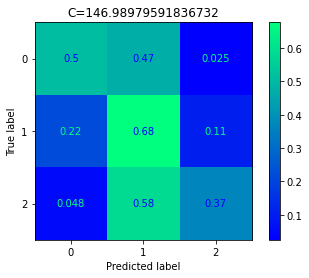

              precision    recall  f1-score   support

           0       0.53      0.68      0.59       452
           1       0.58      0.37      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04806083529589045

SVM - Poly, Train Accuracy = 0.6791730474732006, C=153.11020408163265
Test Accuracy = 0.5530612244897959


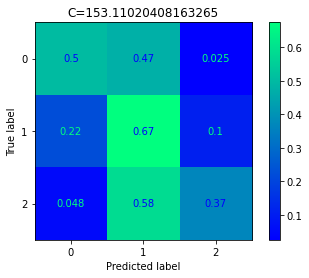

              precision    recall  f1-score   support

           0       0.53      0.67      0.59       452
           1       0.58      0.37      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04417536931750632

SVM - Poly, Train Accuracy = 0.680193976518632, C=159.23061224489794
Test Accuracy = 0.5581632653061225


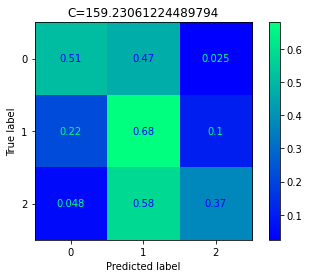

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.053889034263466695

SVM - Poly, Train Accuracy = 0.6794282797345584, C=165.35102040816324
Test Accuracy = 0.560204081632653


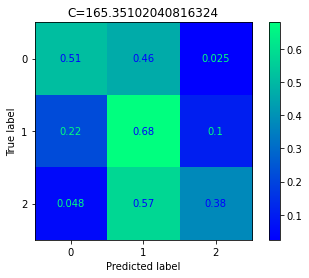

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.38      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.057774500241850824

SVM - Poly, Train Accuracy = 0.6812149055640633, C=171.47142857142856
Test Accuracy = 0.5591836734693878


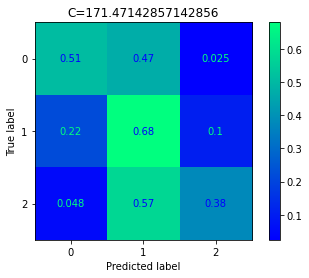

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.38      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.055831767252658704

SVM - Poly, Train Accuracy = 0.6819806023481368, C=177.59183673469386
Test Accuracy = 0.5591836734693878


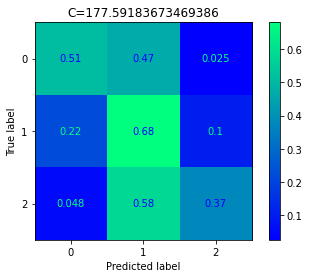

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.055831767252658704

SVM - Poly, Train Accuracy = 0.6812149055640633, C=183.71224489795915
Test Accuracy = 0.5612244897959183


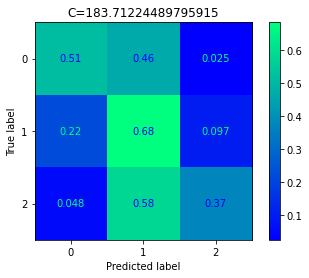

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.60      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05971723323104283

SVM - Poly, Train Accuracy = 0.6817253700867789, C=189.83265306122448
Test Accuracy = 0.5591836734693878


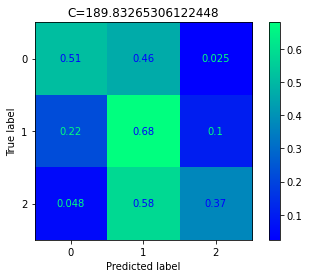

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.055831767252658704

SVM - Poly, Train Accuracy = 0.6809596733027055, C=195.95306122448977
Test Accuracy = 0.560204081632653


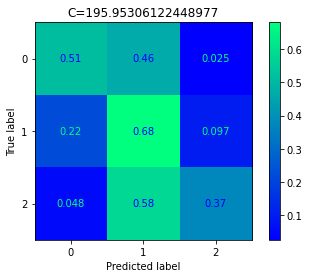

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.60      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.057774500241850824

SVM - Poly, Train Accuracy = 0.6824910668708525, C=202.07346938775507
Test Accuracy = 0.5622448979591836


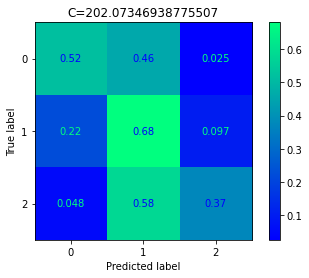

              precision    recall  f1-score   support

           0       0.54      0.68      0.60       452
           1       0.60      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06165996622023495

SVM - Poly, Train Accuracy = 0.6830015313935681, C=208.1938775510204
Test Accuracy = 0.5622448979591836


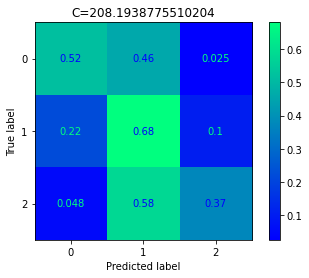

              precision    recall  f1-score   support

           0       0.54      0.68      0.60       452
           1       0.59      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06165996622023495

SVM - Poly, Train Accuracy = 0.6824910668708525, C=214.3142857142857
Test Accuracy = 0.560204081632653


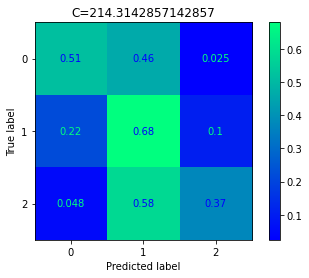

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.057774500241850824

SVM - Poly, Train Accuracy = 0.6832567636549259, C=220.43469387755098
Test Accuracy = 0.5612244897959183


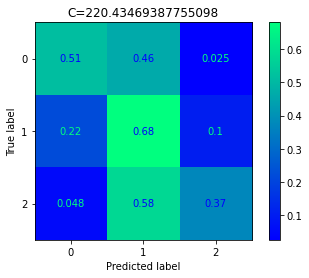

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05971723323104283

SVM - Poly, Train Accuracy = 0.6837672281776417, C=226.5551020408163
Test Accuracy = 0.5612244897959183


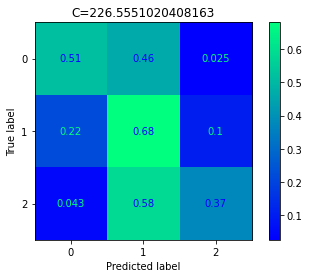

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06554543219861908

SVM - Poly, Train Accuracy = 0.684788157223073, C=232.6755102040816
Test Accuracy = 0.5612244897959183


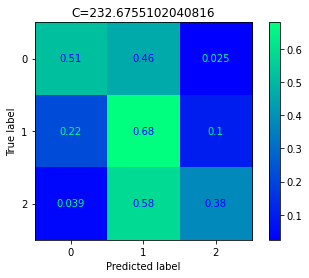

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.60      0.38      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07137363116619522

SVM - Poly, Train Accuracy = 0.6858090862685043, C=238.7959183673469
Test Accuracy = 0.560204081632653


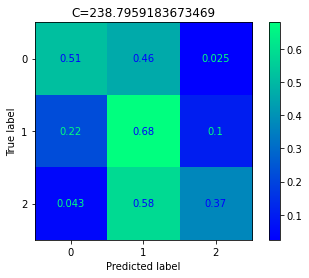

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06360269920942696

SVM - Poly, Train Accuracy = 0.6858090862685043, C=244.91632653061222
Test Accuracy = 0.5622448979591836


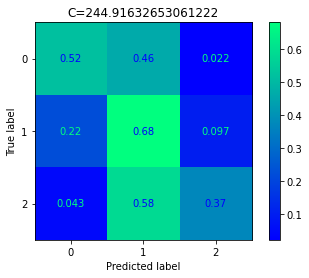

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.60      0.37      0.46       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.07331636415538723

SVM - Poly, Train Accuracy = 0.6852986217457887, C=251.03673469387752
Test Accuracy = 0.560204081632653


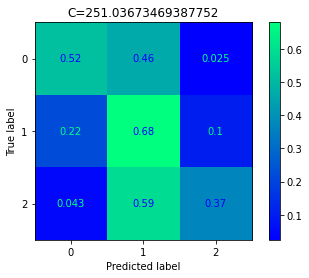

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.37      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06360269920942696

SVM - Poly, Train Accuracy = 0.6837672281776417, C=257.15714285714284
Test Accuracy = 0.5581632653061225


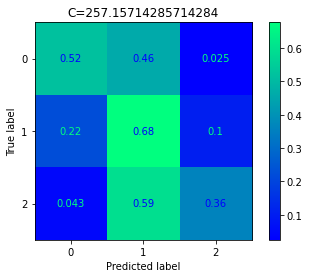

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05971723323104283

SVM - Poly, Train Accuracy = 0.6840224604389995, C=263.27755102040817
Test Accuracy = 0.560204081632653


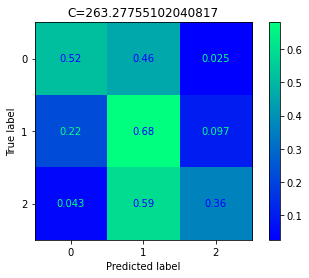

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.36      0.45       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06360269920942696

SVM - Poly, Train Accuracy = 0.6855538540071465, C=269.3979591836735
Test Accuracy = 0.5581632653061225


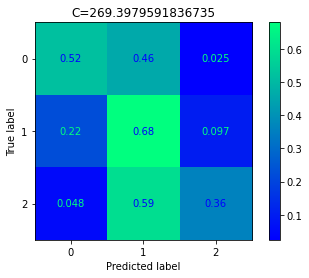

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.36      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.053889034263466695

SVM - Poly, Train Accuracy = 0.6855538540071465, C=275.51836734693876
Test Accuracy = 0.5581632653061225


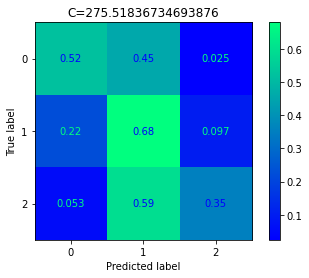

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04806083529589045

SVM - Poly, Train Accuracy = 0.6855538540071465, C=281.6387755102041
Test Accuracy = 0.5581632653061225


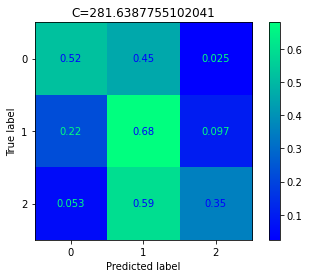

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04806083529589045

SVM - Poly, Train Accuracy = 0.6860643185298622, C=287.7591836734694
Test Accuracy = 0.5561224489795918


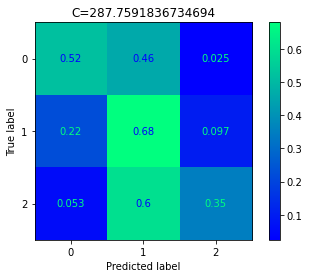

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04417536931750632

SVM - Poly, Train Accuracy = 0.68631955079122, C=293.8795918367347
Test Accuracy = 0.5561224489795918


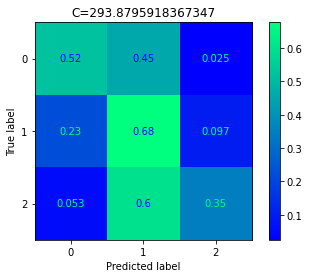

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.58      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04417536931750632

SVM - Poly, Train Accuracy = 0.6860643185298622, C=300.0
Test Accuracy = 0.5571428571428572


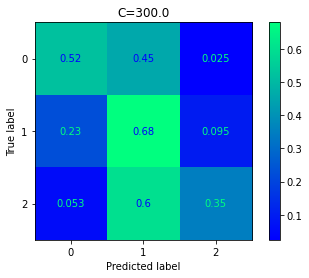

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       452
           1       0.59      0.35      0.44       207
           2       0.00      0.00      0.00         0
		 R2 Score: 0.04611810230669844



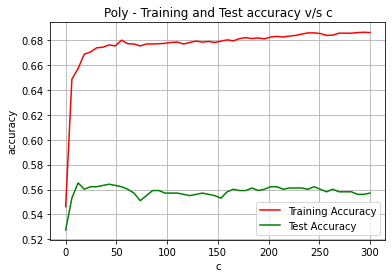

In [136]:
c_svm_linear = np.linspace(0.06, 500)
# c_svm_rbf = np.geomspace(1, 23, num=num_of_different_c)
# c_svm_poly = np.geomspace(0.1, 50, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train All Wines Data

In [137]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_all)

Original y hist: (array([   0,    0,    0,   30,  216, 2138, 2836, 1079,  198]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([2384, 2836, 1277]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (6497, 12)
y[:10]:
[-1. -1.  0.  0.  1. -1.  0. -1.  1. -1.]
X[:10, :]:
[[4.7000e+00 6.7000e-01 9.0000e-02 1.0000e+00 2.0000e-02 5.0000e+00
  9.0000e+00 9.8722e-01 3.3000e+00 3.4000e-01 1.3600e+01]
 [6.0000e+00 1.6000e-01 2.7000e-01 1.2000e+01 3.0000e-02 3.9000e+01
  9.8000e+01 9.9402e-01 3.1500e+00 3.4000e-01 1.0800e+01]
 [6.5000e+00 5.3000e-01 6.0000e-02 2.0000e+00 6.3000e-02 2.9000e+01
  4.4000e+01 9.9489e-01 3.3800e+00 8.3000e-01 1.0300e+01]
 [6.6000e+00 2.4000e-01 3.8000e-01 1.2750e+01 3.4000e-02 8.0000e+00
  7.4000e+01 9.9386e-01 3.1000e+00 5.7000e-01 1.2900e+01]
 [6.7000e+00 1.4000e-01 5.1000e-01 4.3000e+00 2.8000e-02 5.7000e+01
  1.2400e+02 9.9176e-01 2.9100e+00 5.4000e-01 1.0700e+01]
 [6.2000e+00 3.7000e-01 3.0000e-01 6.6000e+00

SVM - Linear, Train Accuracy = 0.5601308447181066, C=0.06
Test Accuracy = 0.5638461538461539


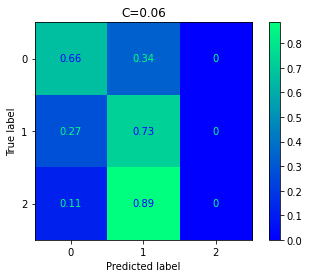

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05975442292052757

SVM - Linear, Train Accuracy = 0.5601308447181066, C=10.262857142857143
Test Accuracy = 0.5646153846153846


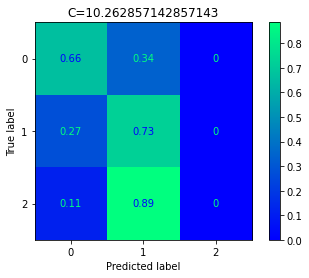

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5597460073119107, C=20.465714285714284
Test Accuracy = 0.5646153846153846


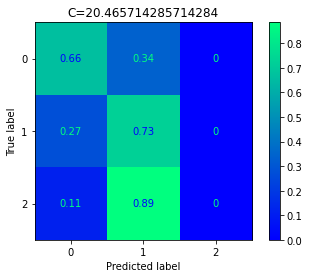

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5597460073119107, C=30.66857142857143
Test Accuracy = 0.5646153846153846


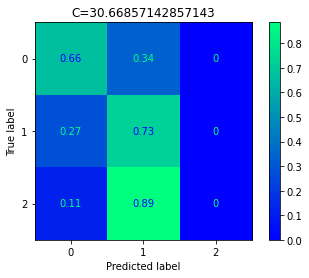

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5601308447181066, C=40.871428571428574
Test Accuracy = 0.5646153846153846


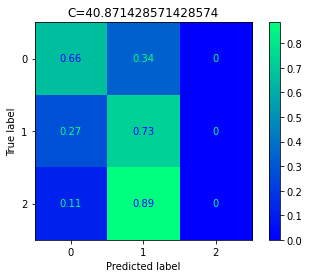

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5601308447181066, C=51.074285714285715
Test Accuracy = 0.5646153846153846


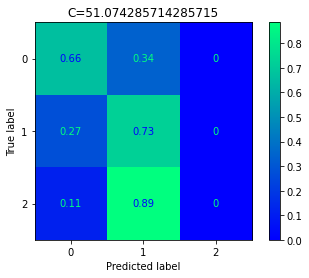

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5597460073119107, C=61.27714285714286
Test Accuracy = 0.5646153846153846


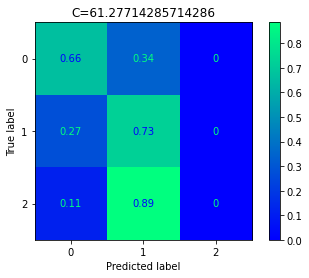

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5597460073119107, C=71.48
Test Accuracy = 0.5646153846153846


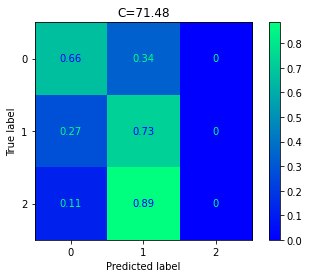

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5597460073119107, C=81.68285714285715
Test Accuracy = 0.5646153846153846


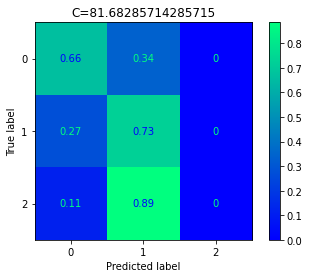

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5595535886088128, C=91.88571428571429
Test Accuracy = 0.5646153846153846


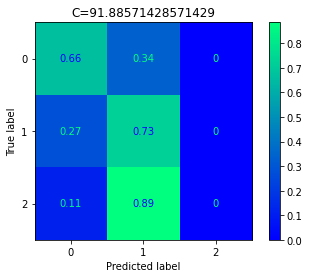

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5595535886088128, C=102.08857142857143
Test Accuracy = 0.5646153846153846


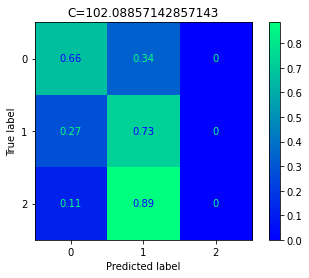

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5603232634212045, C=112.29142857142857
Test Accuracy = 0.5646153846153846


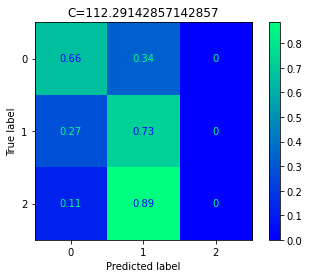

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5601308447181066, C=122.49428571428572
Test Accuracy = 0.5646153846153846


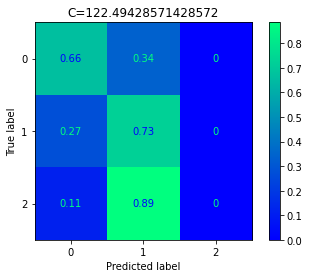

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5595535886088128, C=132.69714285714286
Test Accuracy = 0.5646153846153846


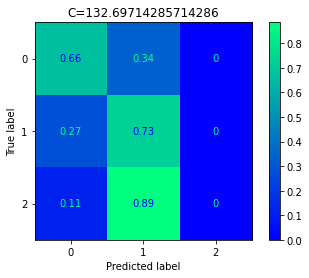

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5599384260150087, C=142.9
Test Accuracy = 0.5646153846153846


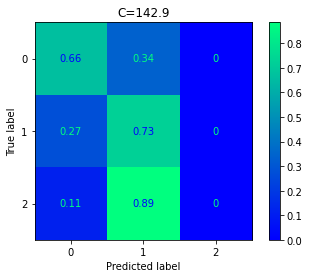

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5601308447181066, C=153.10285714285715
Test Accuracy = 0.5646153846153846


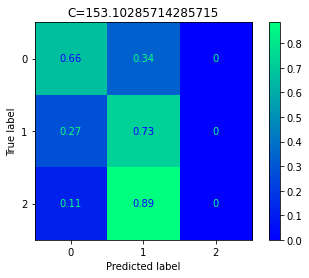

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5595535886088128, C=163.3057142857143
Test Accuracy = 0.5646153846153846


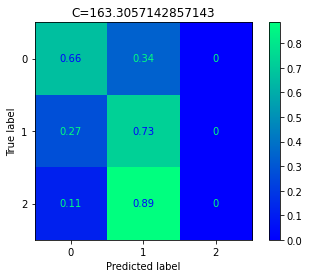

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5595535886088128, C=173.50857142857143
Test Accuracy = 0.5646153846153846


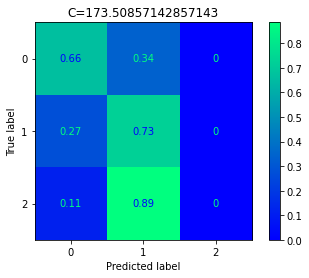

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5595535886088128, C=183.71142857142857
Test Accuracy = 0.5646153846153846


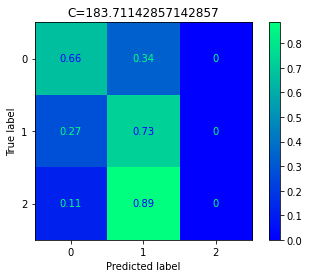

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5595535886088128, C=193.9142857142857
Test Accuracy = 0.5646153846153846


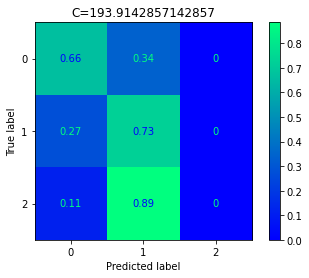

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5595535886088128, C=204.11714285714285
Test Accuracy = 0.5646153846153846


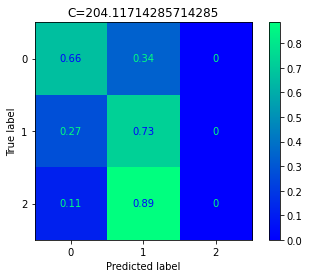

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5599384260150087, C=214.32
Test Accuracy = 0.5646153846153846


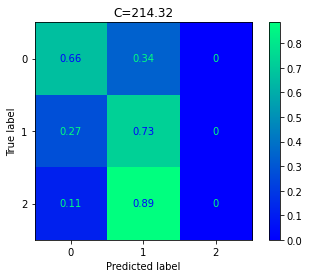

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5601308447181066, C=224.52285714285713
Test Accuracy = 0.5646153846153846


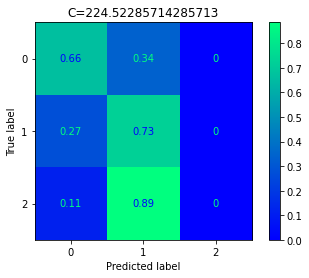

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5595535886088128, C=234.72571428571428
Test Accuracy = 0.5646153846153846


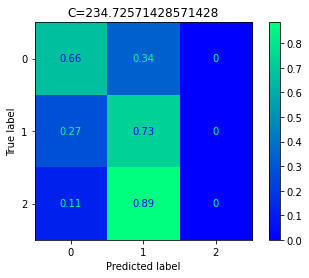

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5599384260150087, C=244.92857142857144
Test Accuracy = 0.5646153846153846


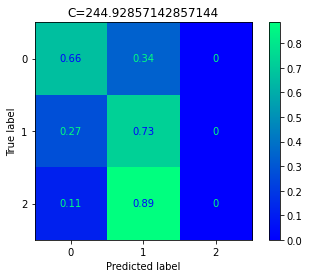

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5599384260150087, C=255.1314285714286
Test Accuracy = 0.5646153846153846


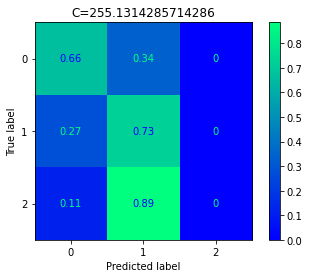

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5601308447181066, C=265.3342857142857
Test Accuracy = 0.5646153846153846


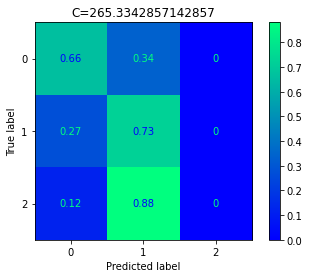

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5597460073119107, C=275.53714285714284
Test Accuracy = 0.5646153846153846


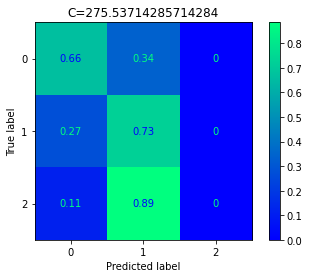

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5597460073119107, C=285.74
Test Accuracy = 0.5646153846153846


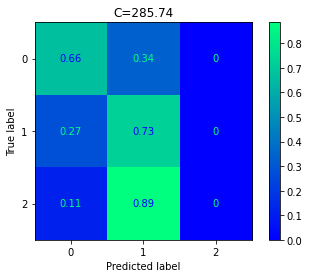

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5601308447181066, C=295.9428571428571
Test Accuracy = 0.5646153846153846


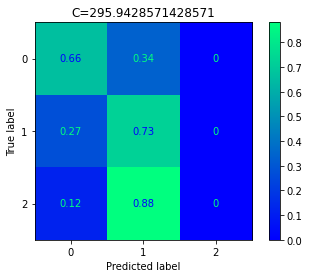

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5597460073119107, C=306.1457142857143
Test Accuracy = 0.5646153846153846


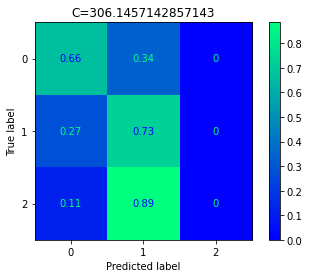

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5599384260150087, C=316.3485714285714
Test Accuracy = 0.5646153846153846


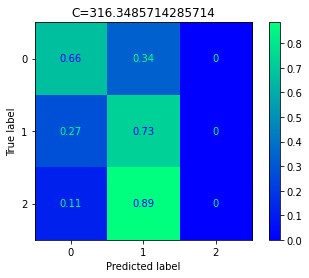

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5601308447181066, C=326.5514285714286
Test Accuracy = 0.5646153846153846


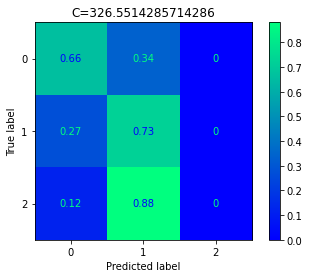

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5599384260150087, C=336.75428571428574
Test Accuracy = 0.5646153846153846


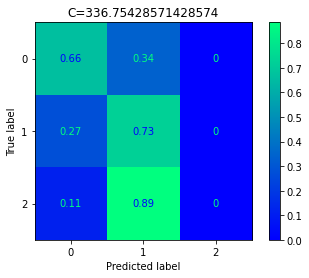

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5597460073119107, C=346.95714285714286
Test Accuracy = 0.5646153846153846


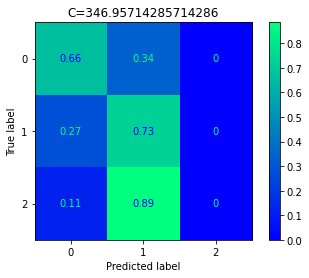

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5599384260150087, C=357.16
Test Accuracy = 0.5646153846153846


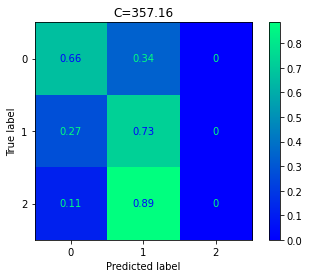

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.06119873256273878

SVM - Linear, Train Accuracy = 0.5601308447181066, C=367.36285714285714
Test Accuracy = 0.5646153846153846


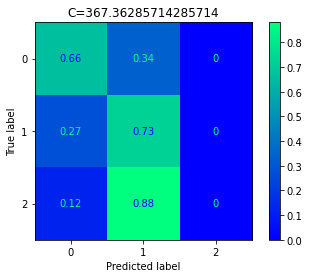

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5597460073119107, C=377.5657142857143
Test Accuracy = 0.5646153846153846


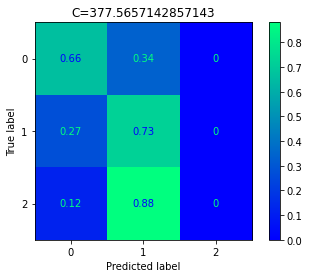

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5599384260150087, C=387.7685714285714
Test Accuracy = 0.5646153846153846


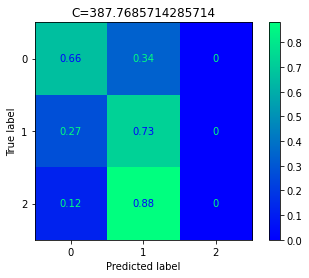

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5599384260150087, C=397.9714285714286
Test Accuracy = 0.5646153846153846


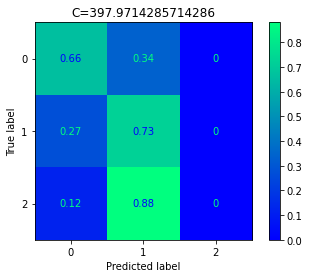

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5601308447181066, C=408.1742857142857
Test Accuracy = 0.5646153846153846


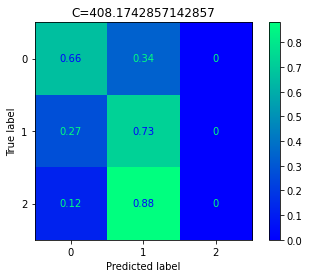

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5597460073119107, C=418.37714285714287
Test Accuracy = 0.5646153846153846


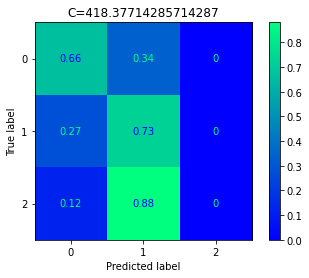

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5597460073119107, C=428.58
Test Accuracy = 0.5646153846153846


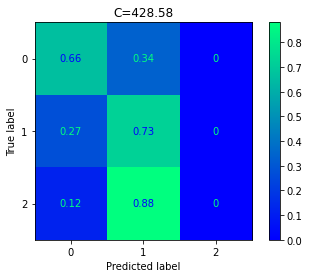

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5599384260150087, C=438.78285714285715
Test Accuracy = 0.5646153846153846


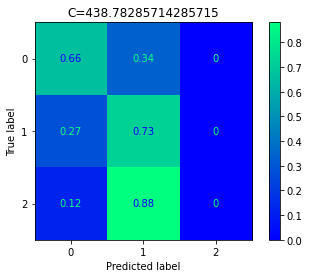

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5599384260150087, C=448.98571428571427
Test Accuracy = 0.5646153846153846


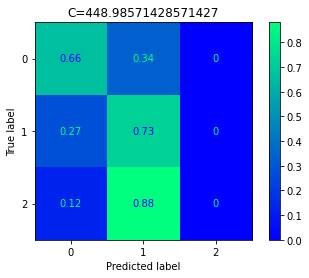

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5599384260150087, C=459.18857142857144
Test Accuracy = 0.5646153846153846


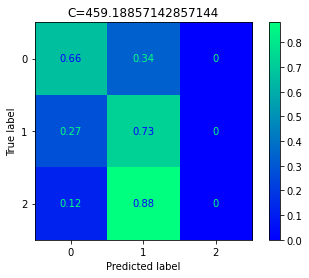

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5599384260150087, C=469.39142857142855
Test Accuracy = 0.5646153846153846


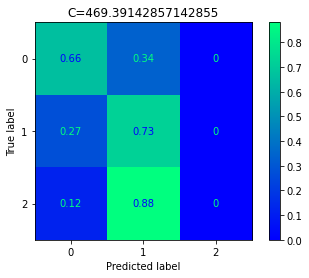

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5601308447181066, C=479.5942857142857
Test Accuracy = 0.5646153846153846


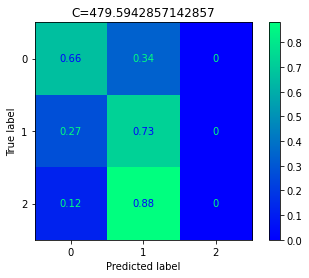

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5599384260150087, C=489.7971428571429
Test Accuracy = 0.5646153846153846


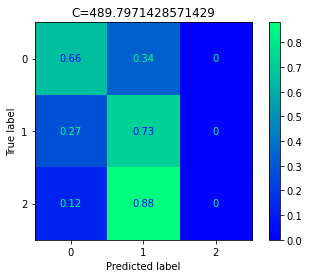

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527

SVM - Linear, Train Accuracy = 0.5599384260150087, C=500.0
Test Accuracy = 0.5646153846153846


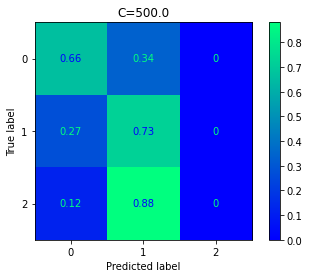

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       558
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.05686580363610527



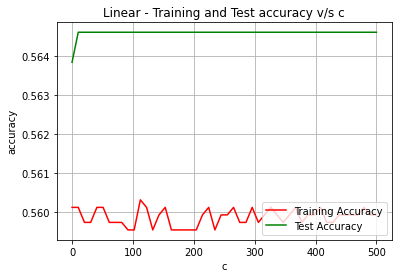

SVM - RBF, Train Accuracy = 0.6532614970175101, C=1.0
Test Accuracy = 0.6207692307692307


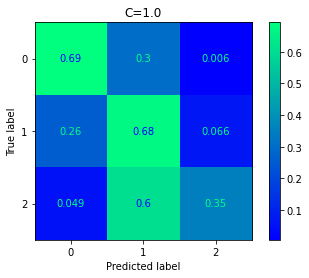

              precision    recall  f1-score   support

           0       0.56      0.68      0.61       558
           1       0.68      0.35      0.46       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.22296141249038992

SVM - RBF, Train Accuracy = 0.7109871079468925, C=7.1020408163265305
Test Accuracy = 0.6461538461538462


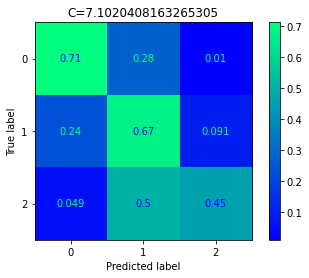

              precision    recall  f1-score   support

           0       0.59      0.67      0.63       558
           1       0.66      0.45      0.54       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2619577728300915

SVM - RBF, Train Accuracy = 0.731960746584568, C=13.204081632653061
Test Accuracy = 0.6469230769230769


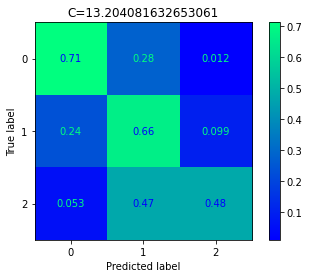

              precision    recall  f1-score   support

           0       0.59      0.66      0.63       558
           1       0.66      0.48      0.55       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25473622461903567

SVM - RBF, Train Accuracy = 0.7488935924571868, C=19.306122448979593
Test Accuracy = 0.65


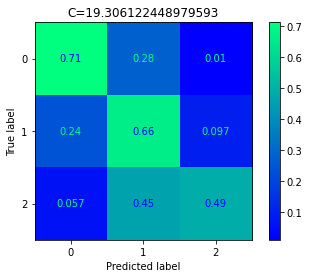

              precision    recall  f1-score   support

           0       0.60      0.66      0.63       558
           1       0.67      0.49      0.56       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2605134631878804

SVM - RBF, Train Accuracy = 0.761593226861651, C=25.408163265306122
Test Accuracy = 0.65


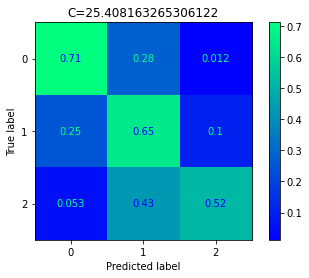

              precision    recall  f1-score   support

           0       0.60      0.65      0.63       558
           1       0.67      0.52      0.58       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2605134631878804

SVM - RBF, Train Accuracy = 0.768135462766981, C=31.51020408163265
Test Accuracy = 0.6515384615384615


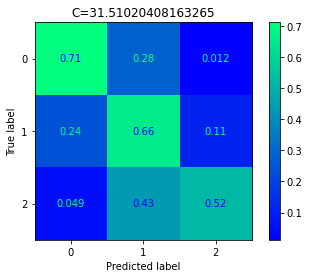

              precision    recall  f1-score   support

           0       0.60      0.66      0.63       558
           1       0.66      0.52      0.58       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2677350113989362

SVM - RBF, Train Accuracy = 0.7769867231094862, C=37.61224489795919
Test Accuracy = 0.6576923076923077


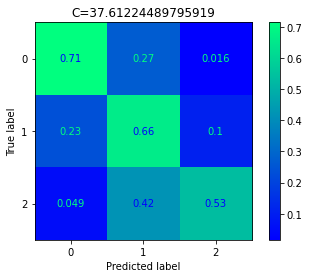

              precision    recall  f1-score   support

           0       0.61      0.66      0.63       558
           1       0.66      0.53      0.59       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2706236306833586

SVM - RBF, Train Accuracy = 0.7866076582643833, C=43.714285714285715
Test Accuracy = 0.6553846153846153


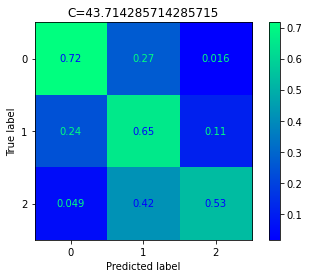

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       558
           1       0.66      0.53      0.59       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2662907017567251

SVM - RBF, Train Accuracy = 0.7950740812006927, C=49.816326530612244
Test Accuracy = 0.6553846153846153


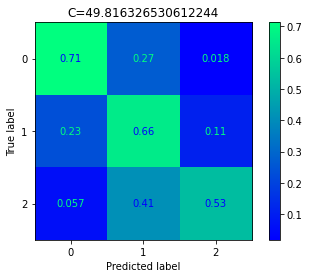

              precision    recall  f1-score   support

           0       0.61      0.66      0.63       558
           1       0.65      0.53      0.59       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25329191497682446

SVM - RBF, Train Accuracy = 0.7985376178564556, C=55.91836734693877
Test Accuracy = 0.6561538461538462


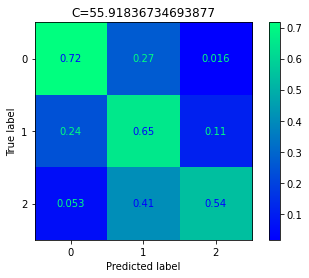

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       558
           1       0.66      0.54      0.60       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2634020824723027

SVM - RBF, Train Accuracy = 0.8043101789493938, C=62.0204081632653
Test Accuracy = 0.6530769230769231


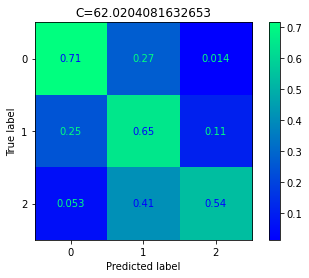

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       558
           1       0.66      0.54      0.59       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2619577728300915

SVM - RBF, Train Accuracy = 0.8089282278237445, C=68.12244897959184
Test Accuracy = 0.6515384615384615


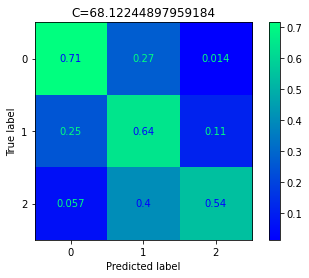

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       558
           1       0.66      0.54      0.59       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25473622461903567

SVM - RBF, Train Accuracy = 0.8114296709640177, C=74.22448979591837
Test Accuracy = 0.6507692307692308


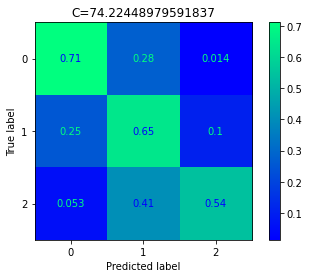

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       558
           1       0.67      0.54      0.60       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25762484390345797

SVM - RBF, Train Accuracy = 0.8158553011352704, C=80.3265306122449
Test Accuracy = 0.6476923076923077


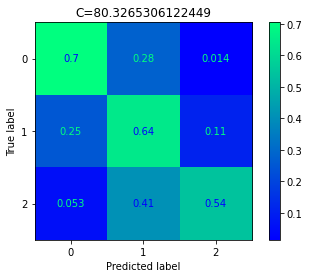

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       558
           1       0.66      0.54      0.60       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25184760533461337

SVM - RBF, Train Accuracy = 0.8223975370406004, C=86.42857142857143
Test Accuracy = 0.6476923076923077


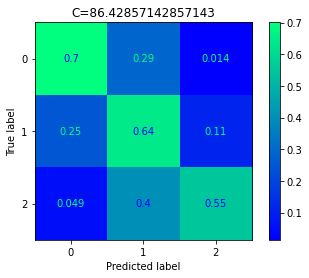

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       558
           1       0.66      0.55      0.60       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2561805342612469

SVM - RBF, Train Accuracy = 0.8252838175870695, C=92.53061224489795
Test Accuracy = 0.6484615384615384


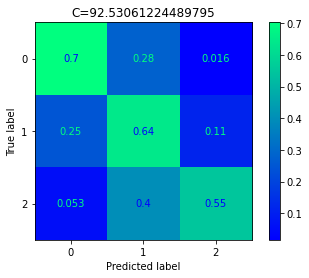

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       558
           1       0.66      0.55      0.60       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24895898605019096

SVM - RBF, Train Accuracy = 0.8283625168366365, C=98.63265306122449
Test Accuracy = 0.6469230769230769


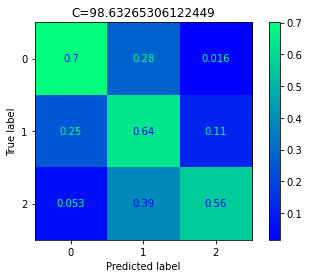

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       558
           1       0.66      0.56      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.24607036676576866

SVM - RBF, Train Accuracy = 0.8283625168366365, C=104.73469387755102
Test Accuracy = 0.6515384615384615


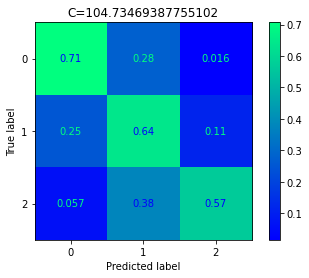

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25040329569240216

SVM - RBF, Train Accuracy = 0.8324033096016933, C=110.83673469387755
Test Accuracy = 0.6515384615384615


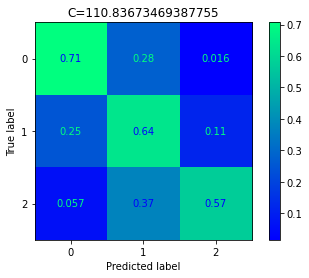

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25040329569240216

SVM - RBF, Train Accuracy = 0.8354820088512603, C=116.93877551020408
Test Accuracy = 0.6530769230769231


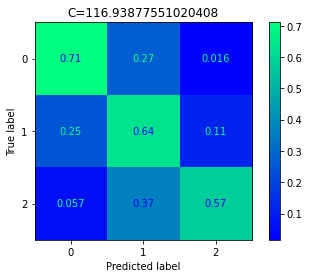

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25329191497682446

SVM - RBF, Train Accuracy = 0.8381758706946315, C=123.0408163265306
Test Accuracy = 0.6561538461538462


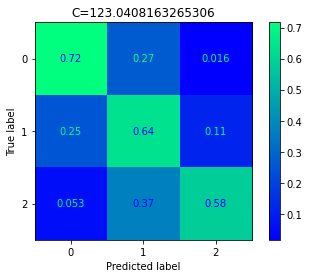

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       558
           1       0.66      0.58      0.62       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2634020824723027

SVM - RBF, Train Accuracy = 0.8420242447565903, C=129.14285714285714
Test Accuracy = 0.6576923076923077


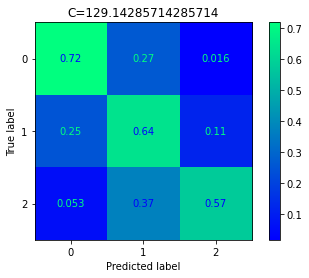

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.66      0.57      0.62       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2662907017567251

SVM - RBF, Train Accuracy = 0.8441408504906677, C=135.24489795918367
Test Accuracy = 0.6592307692307692


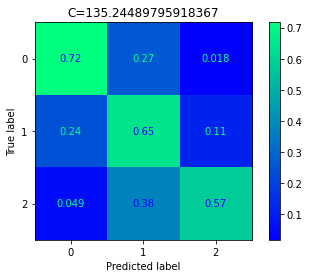

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       558
           1       0.66      0.57      0.62       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2691793210411474

SVM - RBF, Train Accuracy = 0.8481816432557244, C=141.3469387755102
Test Accuracy = 0.6615384615384615


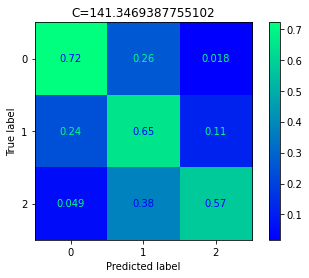

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2735122499677809

SVM - RBF, Train Accuracy = 0.8489513180681162, C=147.44897959183675
Test Accuracy = 0.6592307692307692


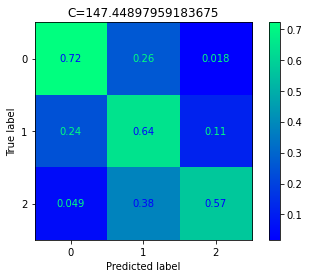

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2691793210411474

SVM - RBF, Train Accuracy = 0.8504906676928997, C=153.55102040816325
Test Accuracy = 0.6584615384615384


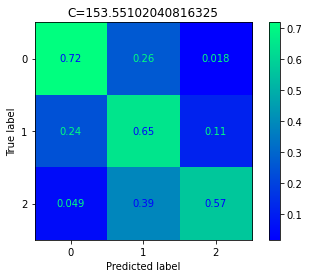

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2677350113989362

SVM - RBF, Train Accuracy = 0.8522224360207812, C=159.6530612244898
Test Accuracy = 0.66


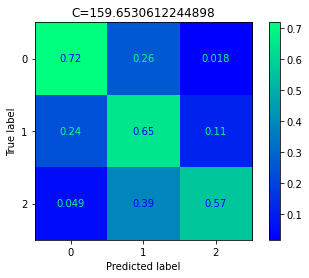

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2706236306833586

SVM - RBF, Train Accuracy = 0.8541466230517606, C=165.75510204081633
Test Accuracy = 0.6576923076923077


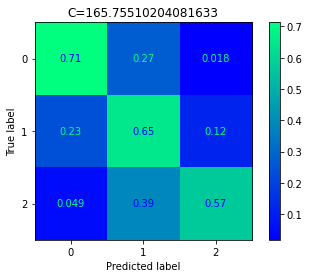

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       558
           1       0.65      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2662907017567251

SVM - RBF, Train Accuracy = 0.8564556474889359, C=171.85714285714286
Test Accuracy = 0.6576923076923077


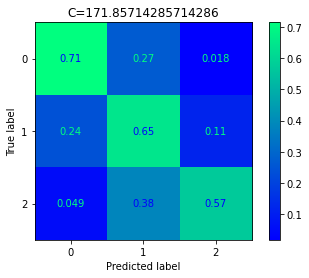

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2662907017567251

SVM - RBF, Train Accuracy = 0.8581874158168173, C=177.9591836734694
Test Accuracy = 0.6576923076923077


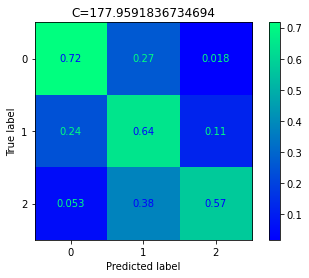

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2619577728300915

SVM - RBF, Train Accuracy = 0.8578025784106215, C=184.0612244897959
Test Accuracy = 0.6546153846153846


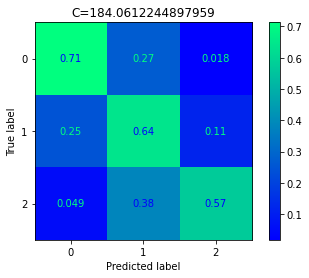

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2605134631878804

SVM - RBF, Train Accuracy = 0.8585722532230132, C=190.16326530612244
Test Accuracy = 0.6538461538461539


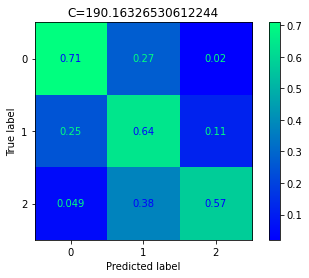

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       558
           1       0.66      0.57      0.61       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.25473622461903567

SVM - RBF, Train Accuracy = 0.859341928035405, C=196.26530612244898
Test Accuracy = 0.6538461538461539


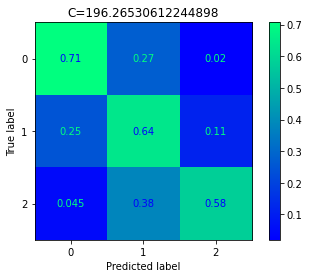

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       558
           1       0.66      0.58      0.62       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2590691535456692

SVM - RBF, Train Accuracy = 0.8603040215508947, C=202.3673469387755
Test Accuracy = 0.6569230769230769


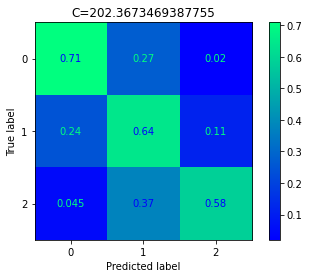

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       558
           1       0.66      0.58      0.62       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2648463921145139

SVM - RBF, Train Accuracy = 0.8622282085818742, C=208.46938775510205
Test Accuracy = 0.6584615384615384


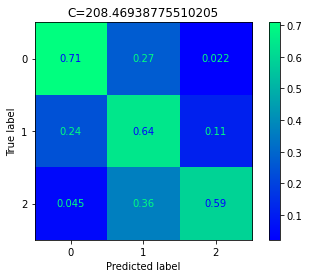

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.66      0.59      0.62       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2634020824723027

SVM - RBF, Train Accuracy = 0.8620357898787763, C=214.57142857142856
Test Accuracy = 0.6592307692307692


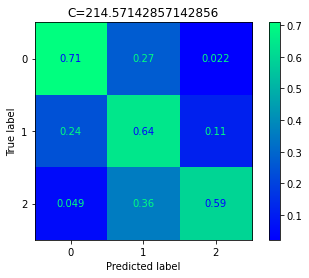

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.66      0.59      0.63       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2605134631878804

SVM - RBF, Train Accuracy = 0.8633827208004619, C=220.6734693877551
Test Accuracy = 0.6584615384615384


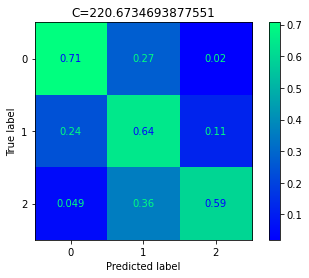

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.66      0.59      0.63       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2634020824723027

SVM - RBF, Train Accuracy = 0.8649220704252454, C=226.77551020408163
Test Accuracy = 0.6561538461538462


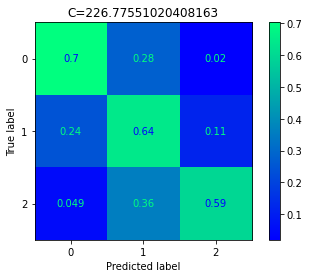

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       558
           1       0.66      0.59      0.63       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2590691535456692

SVM - RBF, Train Accuracy = 0.866076582643833, C=232.87755102040816
Test Accuracy = 0.6561538461538462


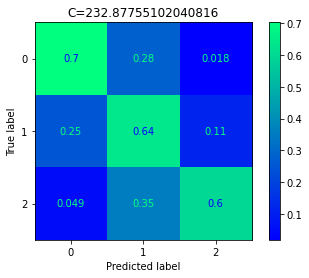

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       558
           1       0.67      0.60      0.63       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2634020824723027

SVM - RBF, Train Accuracy = 0.8680007696748124, C=238.9795918367347
Test Accuracy = 0.6553846153846153


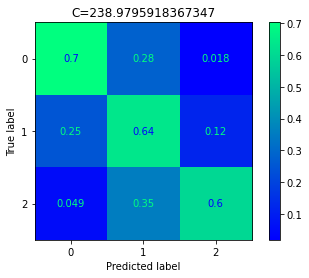

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       558
           1       0.66      0.60      0.63       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2619577728300915

SVM - RBF, Train Accuracy = 0.8703097941119877, C=245.0816326530612
Test Accuracy = 0.6569230769230769


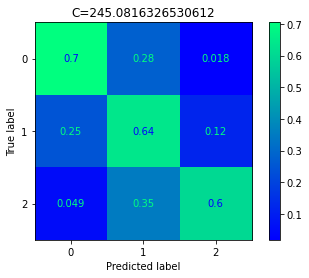

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       558
           1       0.67      0.60      0.63       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2648463921145139

SVM - RBF, Train Accuracy = 0.8730036559553589, C=251.18367346938774
Test Accuracy = 0.6592307692307692


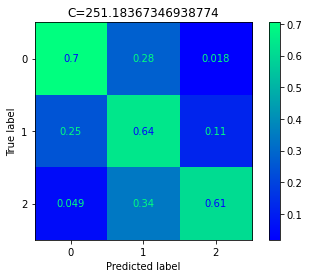

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.67      0.61      0.64       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2691793210411474

SVM - RBF, Train Accuracy = 0.8737733307677507, C=257.2857142857143
Test Accuracy = 0.6615384615384615


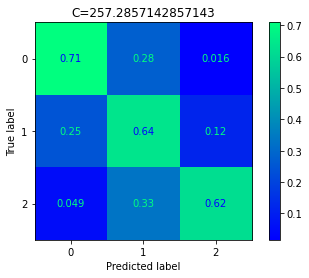

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.67      0.62      0.65       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2778451788944144

SVM - RBF, Train Accuracy = 0.8747354242832404, C=263.3877551020408
Test Accuracy = 0.6638461538461539


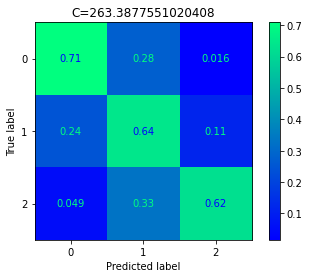

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.68      0.62      0.65       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2821781078210479

SVM - RBF, Train Accuracy = 0.8753126803925342, C=269.48979591836735
Test Accuracy = 0.6638461538461539


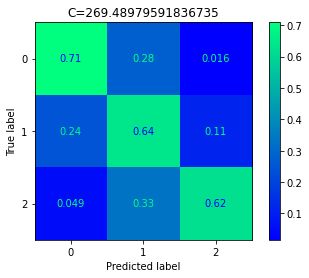

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.68      0.62      0.65       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2821781078210479

SVM - RBF, Train Accuracy = 0.8764671926111218, C=275.59183673469386
Test Accuracy = 0.6638461538461539


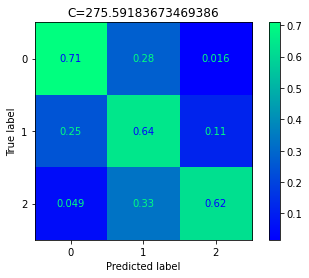

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.68      0.62      0.65       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2821781078210479

SVM - RBF, Train Accuracy = 0.8787762170482971, C=281.6938775510204
Test Accuracy = 0.6646153846153846


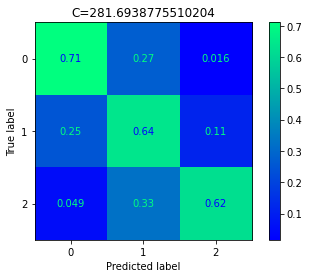

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       558
           1       0.68      0.62      0.65       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2836224174632591

SVM - RBF, Train Accuracy = 0.879161054454493, C=287.7959183673469
Test Accuracy = 0.6684615384615384


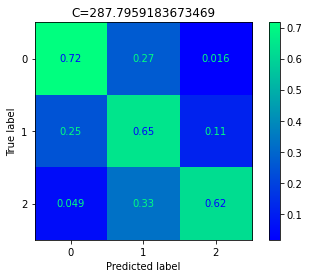

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       558
           1       0.69      0.62      0.65       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2908439656743149

SVM - RBF, Train Accuracy = 0.8795458918606889, C=293.8979591836735
Test Accuracy = 0.6684615384615384


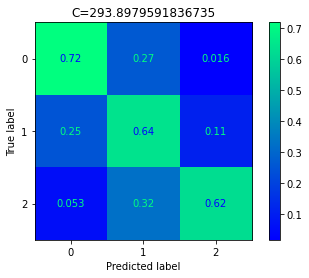

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       558
           1       0.69      0.62      0.65       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2865110367476814

SVM - RBF, Train Accuracy = 0.8799307292668848, C=300.0
Test Accuracy = 0.6684615384615384


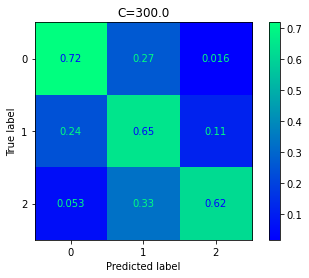

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       558
           1       0.68      0.62      0.65       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.2865110367476814



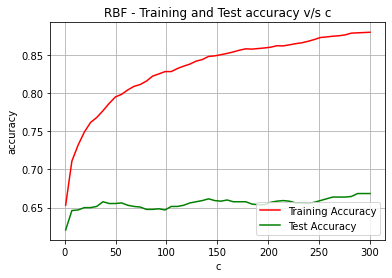

SVM - Poly, Train Accuracy = 0.5447373484702713, C=0.1
Test Accuracy = 0.5276923076923077


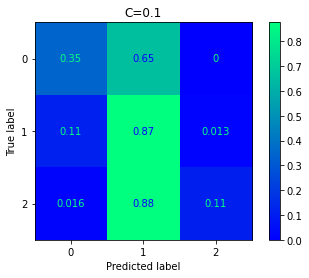

              precision    recall  f1-score   support

           0       0.47      0.87      0.62       558
           1       0.79      0.11      0.19       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.09586216397580682

SVM - Poly, Train Accuracy = 0.6278622282085818, C=6.220408163265305
Test Accuracy = 0.5930769230769231


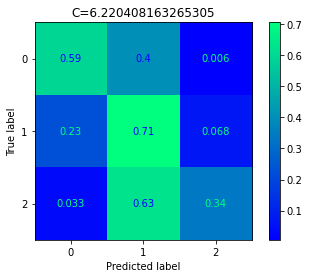

              precision    recall  f1-score   support

           0       0.53      0.71      0.60       558
           1       0.67      0.34      0.45       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18829798107732176

SVM - Poly, Train Accuracy = 0.643832980565711, C=12.34081632653061
Test Accuracy = 0.5976923076923077


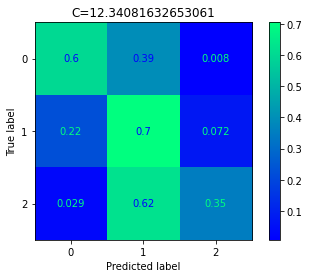

              precision    recall  f1-score   support

           0       0.53      0.70      0.61       558
           1       0.66      0.35      0.46       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19696383893058877

SVM - Poly, Train Accuracy = 0.6436405618626131, C=18.461224489795917
Test Accuracy = 0.5923076923076923


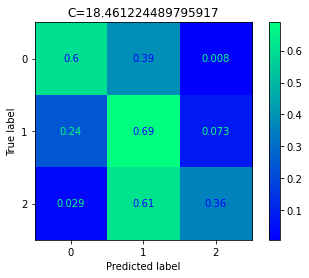

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.66      0.36      0.46       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18685367143511067

SVM - Poly, Train Accuracy = 0.6467192611121801, C=24.581632653061224
Test Accuracy = 0.5930769230769231


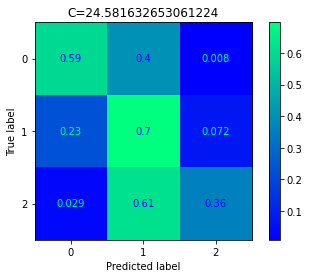

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       558
           1       0.66      0.36      0.46       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18829798107732176

SVM - Poly, Train Accuracy = 0.6496055416586493, C=30.70204081632653
Test Accuracy = 0.5892307692307692


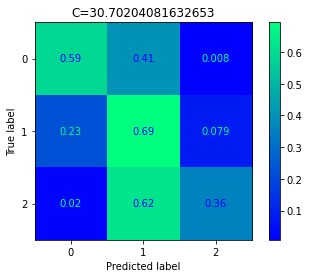

              precision    recall  f1-score   support

           0       0.52      0.69      0.60       558
           1       0.64      0.36      0.46       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18974229071953297

SVM - Poly, Train Accuracy = 0.6511448912834328, C=36.82244897959183
Test Accuracy = 0.59


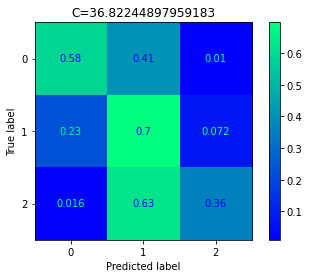

              precision    recall  f1-score   support

           0       0.52      0.70      0.60       558
           1       0.66      0.36      0.46       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6511448912834328, C=42.94285714285714
Test Accuracy = 0.5907692307692308


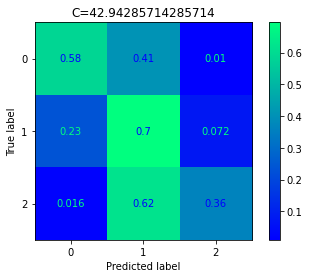

              precision    recall  f1-score   support

           0       0.52      0.70      0.60       558
           1       0.66      0.36      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19263091000395527

SVM - Poly, Train Accuracy = 0.6517221473927266, C=49.063265306122446
Test Accuracy = 0.5884615384615385


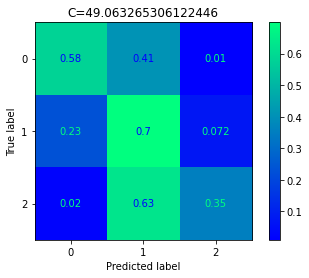

              precision    recall  f1-score   support

           0       0.52      0.70      0.60       558
           1       0.66      0.35      0.46       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18396505215068826

SVM - Poly, Train Accuracy = 0.6522994035020204, C=55.18367346938775
Test Accuracy = 0.5923076923076923


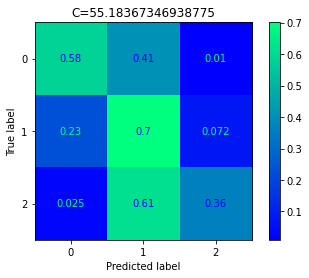

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       558
           1       0.66      0.36      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18685367143511067

SVM - Poly, Train Accuracy = 0.6524918222051184, C=61.30408163265306
Test Accuracy = 0.5915384615384616


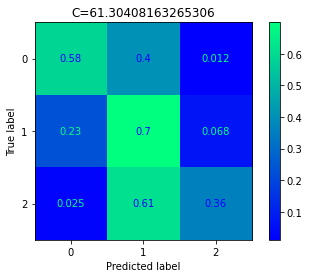

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       558
           1       0.67      0.36      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18107643286626596

SVM - Poly, Train Accuracy = 0.6530690783144122, C=67.42448979591836
Test Accuracy = 0.5884615384615385


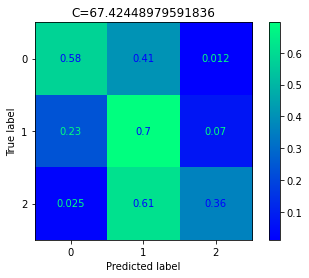

              precision    recall  f1-score   support

           0       0.52      0.70      0.60       558
           1       0.66      0.36      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17529919429742125

SVM - Poly, Train Accuracy = 0.6530690783144122, C=73.54489795918366
Test Accuracy = 0.5876923076923077


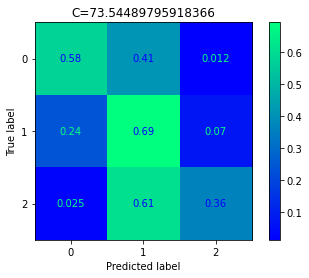

              precision    recall  f1-score   support

           0       0.52      0.69      0.60       558
           1       0.66      0.36      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17385488465521004

SVM - Poly, Train Accuracy = 0.6528766596113142, C=79.66530612244897
Test Accuracy = 0.59


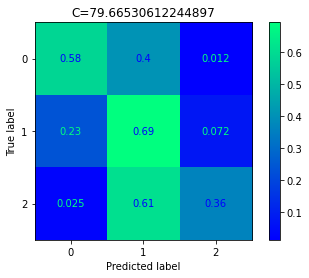

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.66      0.36      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17818781358184355

SVM - Poly, Train Accuracy = 0.6540311718299019, C=85.78571428571428
Test Accuracy = 0.5923076923076923


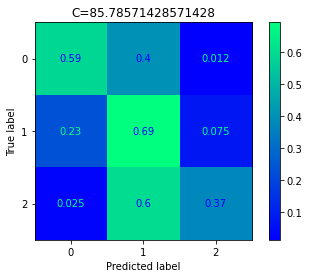

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.65      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18252074250847716

SVM - Poly, Train Accuracy = 0.6542235905329998, C=91.90612244897957
Test Accuracy = 0.5969230769230769


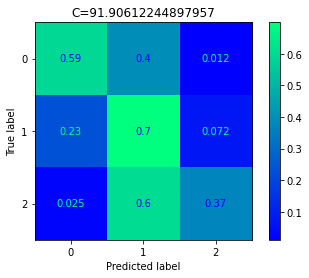

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       558
           1       0.66      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6544160092360978, C=98.02653061224488
Test Accuracy = 0.5984615384615385


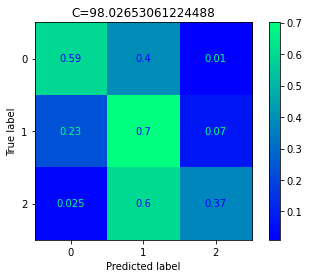

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       558
           1       0.67      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19840814857279998

SVM - Poly, Train Accuracy = 0.6540311718299019, C=104.1469387755102
Test Accuracy = 0.5961538461538461


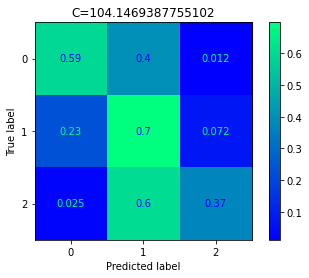

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       558
           1       0.66      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18974229071953297

SVM - Poly, Train Accuracy = 0.6542235905329998, C=110.26734693877549
Test Accuracy = 0.5969230769230769


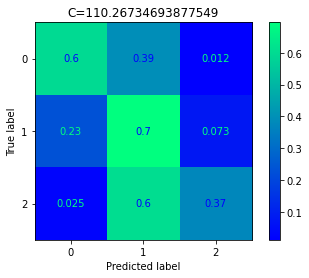

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       558
           1       0.66      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6561477775639792, C=116.3877551020408
Test Accuracy = 0.5992307692307692


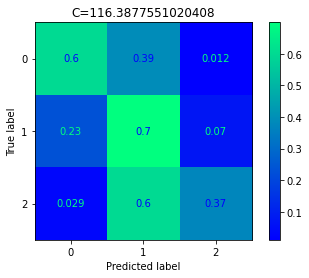

              precision    recall  f1-score   support

           0       0.53      0.70      0.61       558
           1       0.67      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6561477775639792, C=122.50816326530611
Test Accuracy = 0.5984615384615385


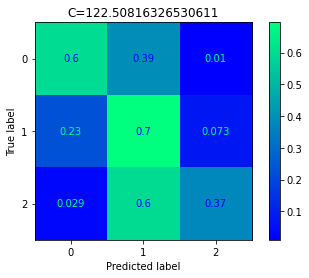

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       558
           1       0.66      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19407521964616647

SVM - Poly, Train Accuracy = 0.6544160092360978, C=128.6285714285714
Test Accuracy = 0.5969230769230769


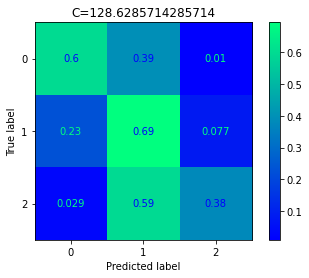

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.66      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6544160092360978, C=134.74897959183673
Test Accuracy = 0.5953846153846154


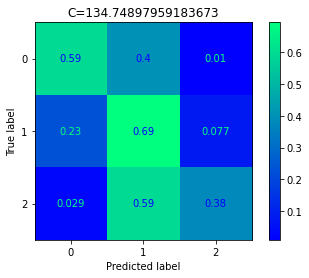

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.66      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18829798107732176

SVM - Poly, Train Accuracy = 0.6546084279391957, C=140.86938775510203
Test Accuracy = 0.5976923076923077


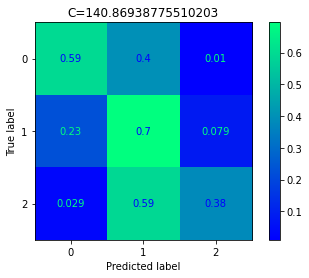

              precision    recall  f1-score   support

           0       0.53      0.70      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19263091000395527

SVM - Poly, Train Accuracy = 0.6544160092360978, C=146.98979591836732
Test Accuracy = 0.5969230769230769


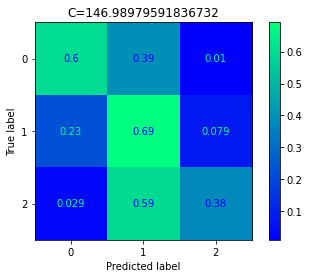

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6548008466422937, C=153.11020408163265
Test Accuracy = 0.5946153846153847


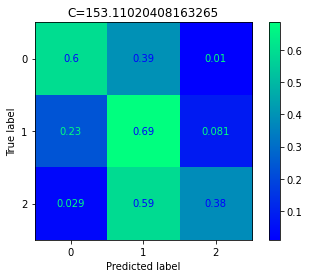

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18685367143511067

SVM - Poly, Train Accuracy = 0.6544160092360978, C=159.23061224489794
Test Accuracy = 0.5946153846153847


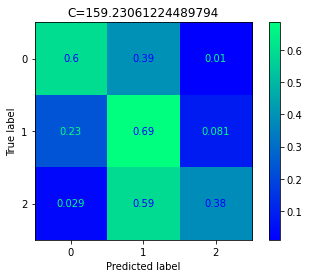

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18685367143511067

SVM - Poly, Train Accuracy = 0.6542235905329998, C=165.35102040816324
Test Accuracy = 0.5946153846153847


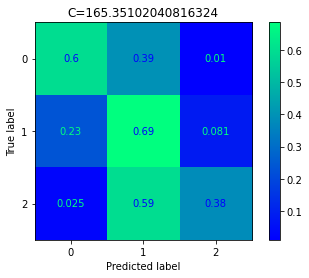

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6544160092360978, C=171.47142857142856
Test Accuracy = 0.5946153846153847


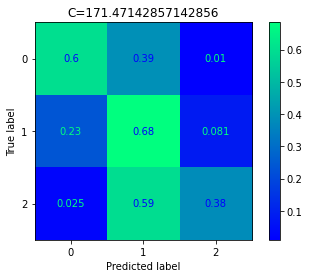

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6555705214546854, C=177.59183673469386
Test Accuracy = 0.5930769230769231


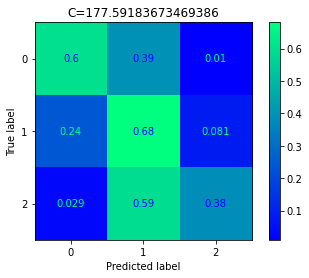

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18396505215068826

SVM - Poly, Train Accuracy = 0.6557629401577834, C=183.71224489795915
Test Accuracy = 0.5930769230769231


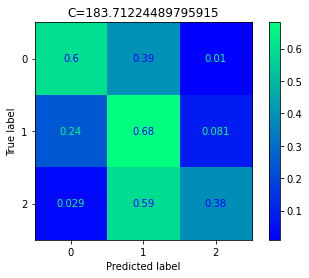

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18396505215068826

SVM - Poly, Train Accuracy = 0.6565326149701751, C=189.83265306122448
Test Accuracy = 0.5946153846153847


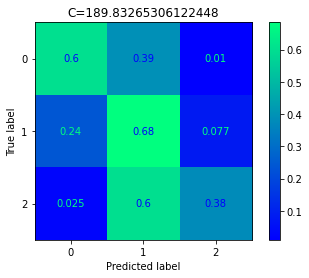

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.66      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6559553588608813, C=195.95306122448977
Test Accuracy = 0.5923076923076923


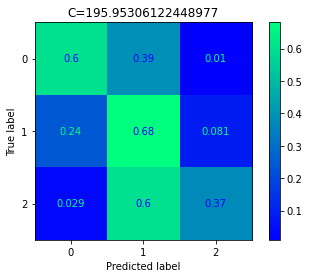

              precision    recall  f1-score   support

           0       0.53      0.68      0.59       558
           1       0.65      0.37      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18252074250847716

SVM - Poly, Train Accuracy = 0.6561477775639792, C=202.07346938775507
Test Accuracy = 0.5923076923076923


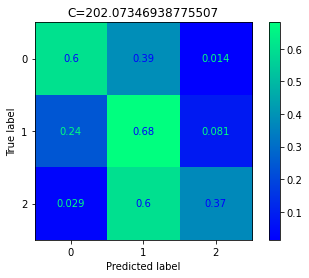

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.64      0.37      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17385488465521004

SVM - Poly, Train Accuracy = 0.6561477775639792, C=208.1938775510204
Test Accuracy = 0.5923076923076923


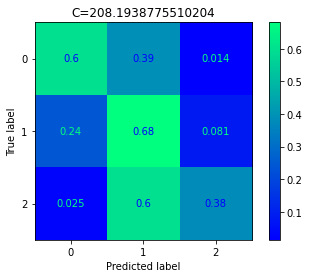

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.64      0.38      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.17818781358184355

SVM - Poly, Train Accuracy = 0.6578795458918607, C=214.3142857142857
Test Accuracy = 0.5938461538461538


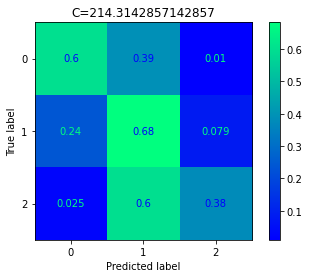

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18974229071953297

SVM - Poly, Train Accuracy = 0.6578795458918607, C=220.43469387755098
Test Accuracy = 0.5953846153846154


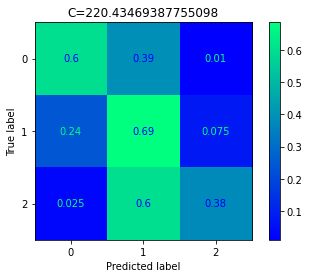

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.66      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19263091000395527

SVM - Poly, Train Accuracy = 0.6574947084856648, C=226.5551020408163
Test Accuracy = 0.5938461538461538


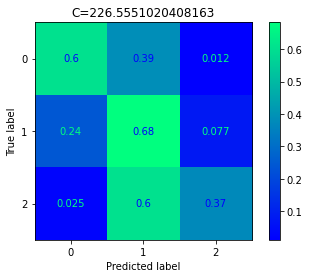

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.37      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18540936179289946

SVM - Poly, Train Accuracy = 0.6580719645949586, C=232.6755102040816
Test Accuracy = 0.5969230769230769


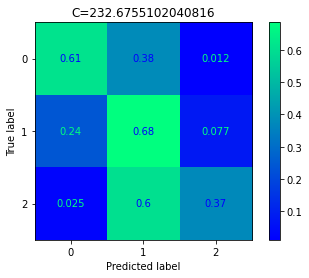

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.37      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19118660036174417

SVM - Poly, Train Accuracy = 0.6596113142197422, C=238.7959183673469
Test Accuracy = 0.5953846153846154


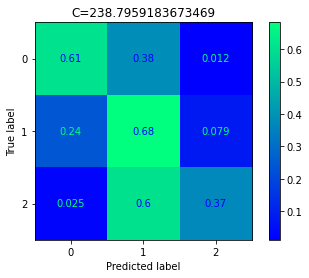

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.37      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18829798107732176

SVM - Poly, Train Accuracy = 0.6596113142197422, C=244.91632653061222
Test Accuracy = 0.5961538461538461


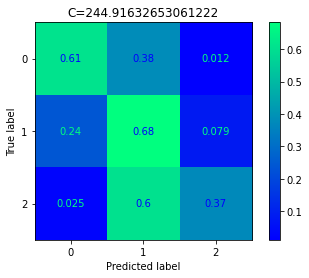

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.37      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18974229071953297

SVM - Poly, Train Accuracy = 0.6598037329228401, C=251.03673469387752
Test Accuracy = 0.5976923076923077


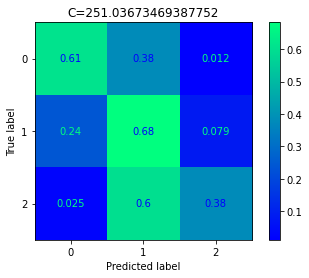

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19263091000395527

SVM - Poly, Train Accuracy = 0.6598037329228401, C=257.15714285714284
Test Accuracy = 0.5984615384615385


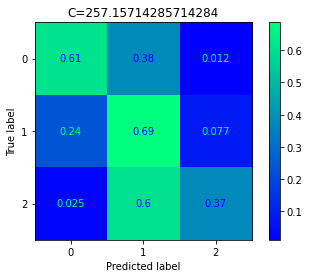

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.65      0.37      0.47       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19407521964616647

SVM - Poly, Train Accuracy = 0.6590340581104484, C=263.27755102040817
Test Accuracy = 0.5984615384615385


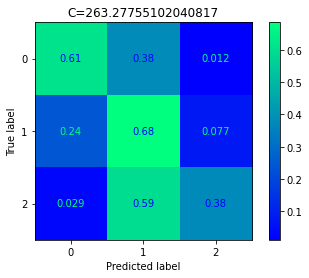

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18974229071953297

SVM - Poly, Train Accuracy = 0.6590340581104484, C=269.3979591836735
Test Accuracy = 0.5984615384615385


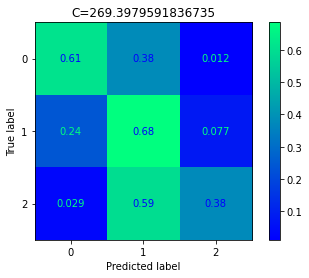

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18974229071953297

SVM - Poly, Train Accuracy = 0.6603809890321339, C=275.51836734693876
Test Accuracy = 0.5969230769230769


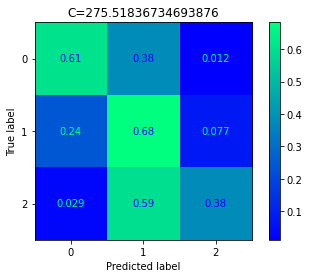

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18685367143511067

SVM - Poly, Train Accuracy = 0.659996151625938, C=281.6387755102041
Test Accuracy = 0.5984615384615385


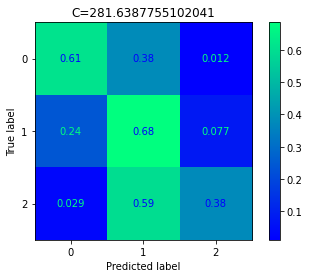

              precision    recall  f1-score   support

           0       0.53      0.68      0.60       558
           1       0.65      0.38      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.18974229071953297

SVM - Poly, Train Accuracy = 0.660188570329036, C=287.7591836734694
Test Accuracy = 0.6007692307692307


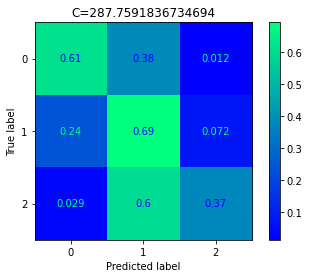

              precision    recall  f1-score   support

           0       0.54      0.69      0.60       558
           1       0.66      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19407521964616647

SVM - Poly, Train Accuracy = 0.6607658264383298, C=293.8795918367347
Test Accuracy = 0.6007692307692307


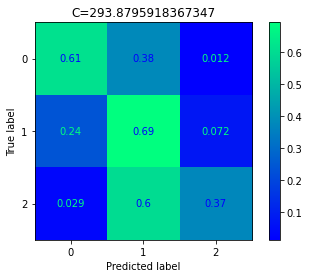

              precision    recall  f1-score   support

           0       0.54      0.69      0.60       558
           1       0.66      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19407521964616647

SVM - Poly, Train Accuracy = 0.6603809890321339, C=300.0
Test Accuracy = 0.6


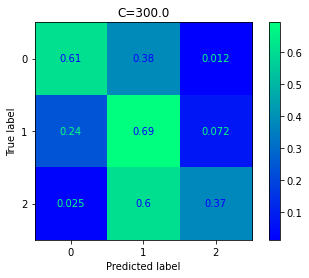

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       558
           1       0.66      0.37      0.48       244
           2       0.00      0.00      0.00         0
		 R2 Score: 0.19696383893058877



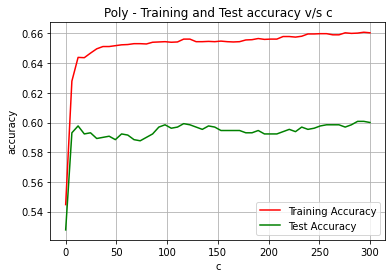

In [138]:
# c_svm_linear = np.geomspace(0.06, 0.4, num=num_of_different_c)
# c_svm_rbf = np.geomspace(1, 23, num=num_of_different_c)
# c_svm_poly = np.geomspace(0.1, 50, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)